![](https://www.finplus.co.in/wp-content/uploads/2017/10/Top-Categories-In-Online-Retail-In-India.jpg)

## Contexto
<a href="https://drive.google.com/file/d/1T1YHmTUcnOgVfTLnQRtNrzLIgazr2N4S/view?usp=sharing">Online retail es un dataset transaccional</a> que contiene todas las transacciones que ocurrieron entre el 1/12/2010 y el 9/12/2011 en el e-commerce de UK. La compañía vende principalmente regalos y sus clientes tienden a ser revendedores que compran al por mayor.

## Documentación
https://archive.ics.uci.edu/dataset/352/online+retail

## Objetivo de Negocio
"Buscamos segmentar a nuestros clientes para entender sus características y patrones de compra para así poder ofrecerles una mejor experiencia."

**En base a los clusteres creados, expliquenos las características de cada tipo de cliente y qué productos podríamos ofrecerles.**



## Consigna
1. Hacer un breve análisis descriptivo del dataset
2. Al ser un dataset transaccional, hacer todas las modificaciones necesarias para poder utilizarlo (agrupaciones, agregar columnas, etc).
3. Probar los modelos que conocen para dividir en clusters, elegir el que mejor resultado les de.
4. En base a los clusteres creados, expliquen las características de cada tipo de cliente y qué productos se podría ofrecerles.

---

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTACIÓN DE LIBRERÍAS</p>

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import ListedColormap
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CARGA DE DATOS</p>

In [210]:
df_retail = pd.read_excel('/Users/lolonastri/Desktop/IA_UCEMA/trabajos_practicos/tp4_onlineretail/data/Online Retail.xlsx', sheet_name='Online Retail')
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">COMPRENSIÓN DE LOS DATOS</p>

### → Validación de la data

In [211]:
print("El dataset tiene" , df_retail.shape[0], "filas y", df_retail.shape[1], "columnas")

El dataset tiene 541909 filas y 8 columnas


In [212]:
df_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [213]:
from funciones.funciones import validate_columns
validate_columns(df_retail)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
InvoiceNo,25900.0,541909.0,0,0.000000,"[555200, 554974, 550972, 576652, 546157]"
StockCode,4070,541909,0,0.000000,"[71459, 21128, 21086, 22812, 22180]"
Description,4223,540455,1454,0.268311,"[HANGING JAM JAR T-LIGHT HOLDER, GOLD FISHING ..."
Quantity,NaN,541909.0,0,0.000000,"[24, 4, 4, 3, 2]"
InvoiceDate,NaN,541909,0,0.000000,"[2011-06-01 12:05:00, 2011-05-27 17:14:00, 201..."
UnitPrice,NaN,541909.0,0,0.000000,"[0.85, 6.95, 0.65, 1.95, 9.95]"
CustomerID,NaN,406829.0,135080,24.926694,"[17315.0, 14031.0, 14031.0, 17198.0, 13502.0]"
Country,38,541909,0,0.000000,"[United Kingdom, United Kingdom, United Kingdo..."


In [214]:
df_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### →  Veo los tipos de datos con dtypes

In [215]:
df_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### → Valores outliers

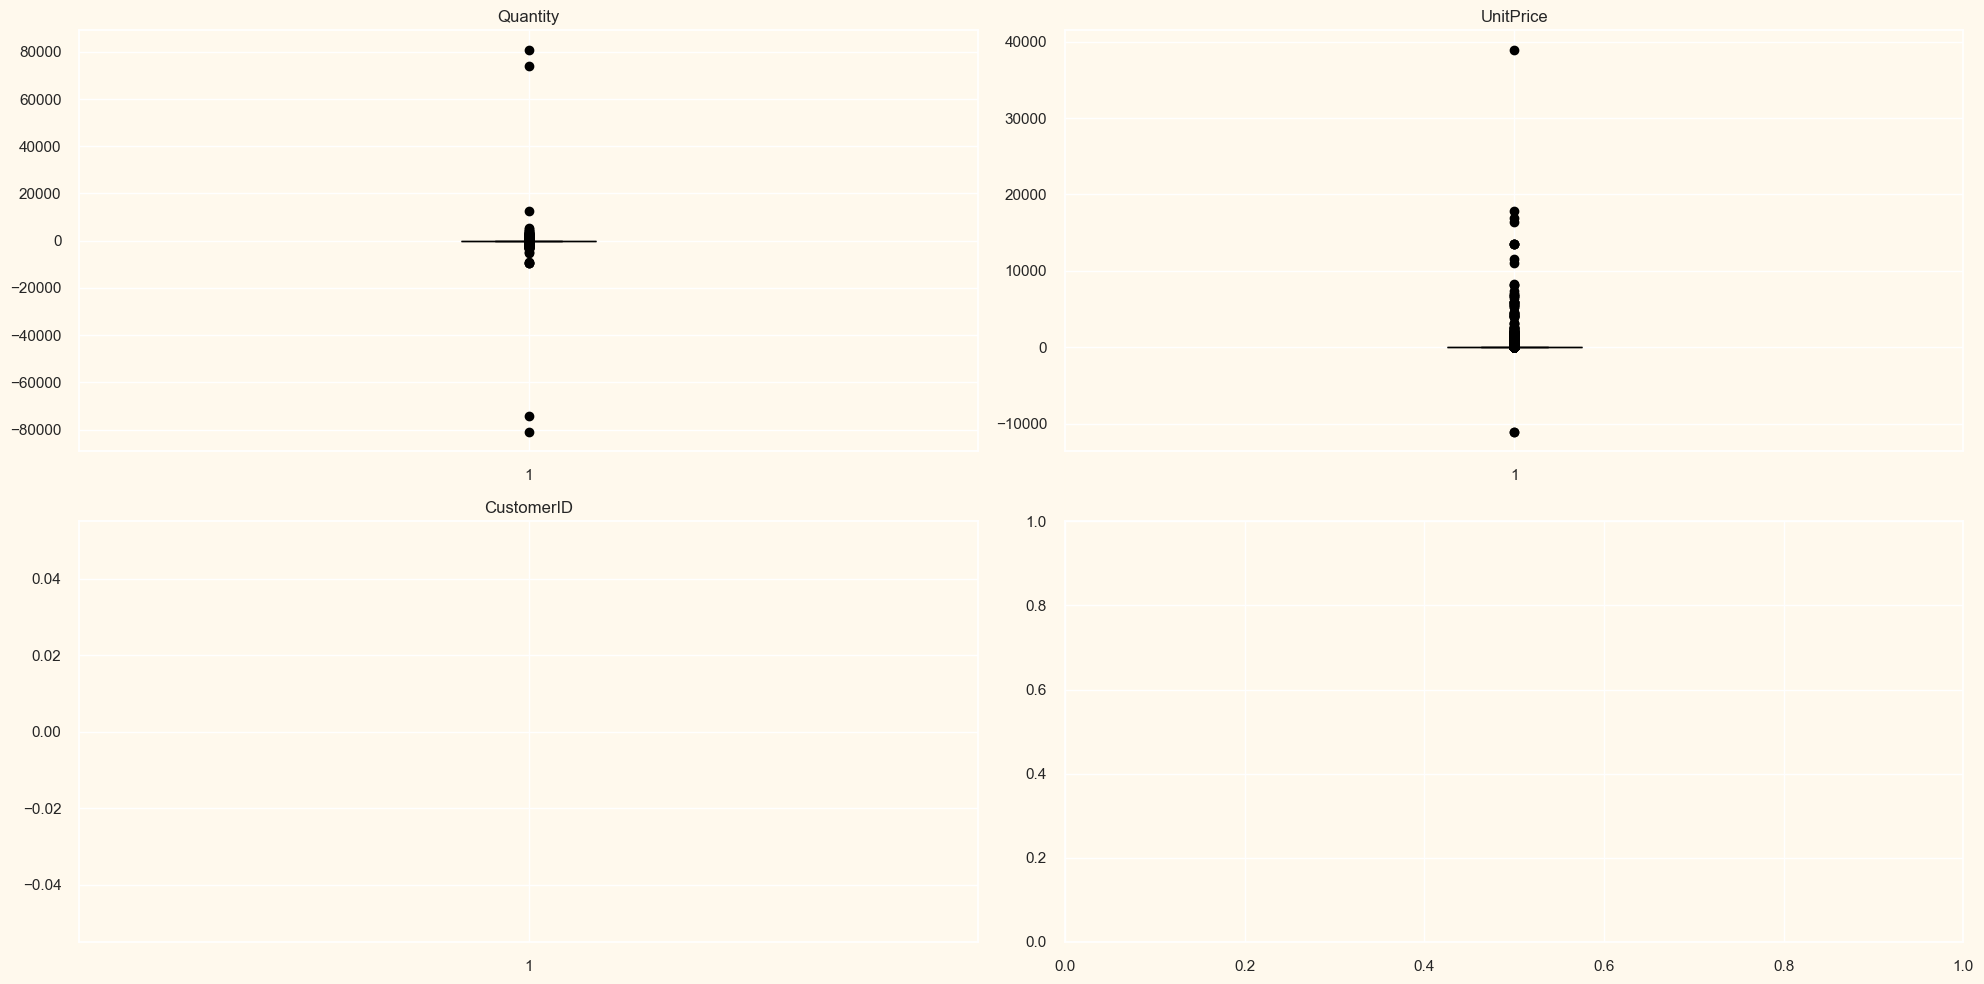

In [216]:
from funciones.funciones import plot_outliers
plot_outliers(df_retail)



### 📦 Quantity
- Se observan **valores extremadamente altos y bajos**.
- **Outliers positivos:** cantidades mayores a 80.000 unidades podrían ser errores o ventas mayoristas atípicas.
- **Outliers negativos:** cantidades negativas (ej. -80.000) probablemente representan **devoluciones**.

---

### 💵 UnitPrice
- Se detectan **valores negativos**, lo cual **no tiene sentido comercial** (precio < 0).
- También hay **precios excesivamente altos** (ej. > 30.000), posiblemente errores tipográficos.

Decido eliminar los outliers negativos, ya que no tienen sentido comercial. Para los outliers positivos, los mantengo, ya que podrían representar ventas mayoristas o productos de lujo.



<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">LIMPIEZA DE DATOS</p>

In [217]:
# Filtrar facturas que empiezan con "C"
df_devoluciones = df_retail[df_retail['InvoiceNo'].astype(str).str.startswith('C')]

print(f"Hay {df_devoluciones.shape[0]} registros de devoluciones.")
df_devoluciones[['InvoiceNo', 'CustomerID', 'Description', 'Quantity', 'UnitPrice']].head(10)

Hay 9288 registros de devoluciones.


,InvoiceNo,CustomerID,Description,Quantity,UnitPrice
141,C536379,14527.0,Discount,-1,27.50
154,C536383,15311.0,SET OF 3 COLOURED FLYING DUCKS,-1,4.65
235,C536391,17548.0,PLASTERS IN TIN CIRCUS PARADE,-12,1.65
236,C536391,17548.0,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29
237,C536391,17548.0,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29
238,C536391,17548.0,PACK OF 12 RED RETROSPOT TISSUES,-24,0.29
239,C536391,17548.0,CHICK GREY HOT WATER BOTTLE,-12,3.45
240,C536391,17548.0,PLASTERS IN TIN VINTAGE PAISLEY,-12,1.65
241,C536391,17548.0,PLASTERS IN TIN SKULLS,-24,1.65
939,C536506,17897.0,JAM MAKING SET WITH JARS,-6,4.25


💡 **¿Por qué eliminarlas?**

- Las facturas cuyo `InvoiceNo` comienza con la letra **"C"** representan **notas de crédito** o **devoluciones de productos** hechas por los clientes.
- Estas transacciones **restan stock** y en general **no reflejan un comportamiento de compra**.
- Pueden **distorsionar el cálculo** de gasto total, cantidad comprada y frecuencia de compra.
Como el objetivo es **entender el comportamiento de compra real**, se eliminan.


In [218]:
# Copia de seguridad del dataset original
df_clean = df_retail.copy()

# Elimino las filas con CustomerID nulo porque no puedo hacer nada con ellas
df_clean = df_clean.dropna(subset=['CustomerID'])

# Filtro las cantidades y precios mayores a cero porque no tienen sentido
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# Elimino las devoluciones (InvoiceNo que empieza con 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

df_clean.reset_index(drop=True, inplace=True)

print("Después de la limpieza, el dataset tiene", df_clean.shape[0], "filas y", df_clean.shape[1], "columnas.")
df_clean.head()

Después de la limpieza, el dataset tiene 397884 filas y 8 columnas.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">GENERACIÓN DE NUEVAS CARACTERÍSTICAS</p>

In [219]:
# 1. Creo la columna de monto gastado
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 2. Agregación principal por CustomerID
df_clientes = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',       # Número de compras distintas
    'Quantity': 'sum',            # Cantidad total de productos comprados
    'TotalAmount': 'sum',         # Gasto total
    'Country': 'first'            # País 
}).rename(columns={
    'InvoiceNo': 'n_compras',
    'Quantity': 'cantidad_total',
    'TotalAmount': 'gasto_total',
    'Country': 'pais'
}).reset_index()

# 3. Obtengo el producto más comprado por cliente
top_product = df_clean.groupby(['CustomerID', 'Description'])['Quantity'].sum().reset_index()
idx = top_product.groupby('CustomerID')['Quantity'].idxmax()
productos_top = top_product.loc[idx][['CustomerID', 'Description']].set_index('CustomerID')

# 4. Mergeo el producto más comprado al DataFrame principal
df_clientes = df_clientes.set_index('CustomerID')
df_clientes['producto_top'] = productos_top['Description']
df_clientes = df_clientes.reset_index()

# 5. Tomo como fecha de referencia la fecha máxima de compra
fecha_max = df_clean['InvoiceDate'].max()

# 6. Recencia (días desde la última compra)
ultima_compra = df_clean.groupby('CustomerID')['InvoiceDate'].max()
recencia_dias = (fecha_max - ultima_compra).dt.days

# 7. Número de productos distintos
n_productos_distintos = df_clean.groupby('CustomerID')['Description'].nunique()

# 8. Ticket promedio
ticket_promedio = df_clientes['gasto_total'] / df_clientes['n_compras']

# 9. Frecuencia mensual
dias_totales = (df_clean['InvoiceDate'].max() - df_clean['InvoiceDate'].min()).days
frecuencia_mensual = df_clientes['n_compras'] / (dias_totales / 30)

# 10. Intensidad de compra (productos por compra)
intensidad_compra = df_clientes['cantidad_total'] / df_clientes['n_compras']

In [220]:
# --- Asigno al DataFrame usando .map() donde corresponda ---
df_clientes['recencia_dias'] = df_clientes['CustomerID'].map(recencia_dias)
df_clientes['n_productos_distintos'] = df_clientes['CustomerID'].map(n_productos_distintos)
df_clientes['ticket_promedio'] = ticket_promedio
df_clientes['frecuencia_mensual'] = frecuencia_mensual
df_clientes['intensidad_compra'] = intensidad_compra

In [221]:
df_clientes.head()

,CustomerID,n_compras,cantidad_total,gasto_total,pais,producto_top,recencia_dias,n_productos_distintos,ticket_promedio,frecuencia_mensual,intensidad_compra
0,12346.0,1,74215,77183.60,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,325,1,77183.600000,0.080429,74215.000000
1,12347.0,7,2458,4310.00,Iceland,ICE CREAM SUNDAE LIP GLOSS,1,103,615.714286,0.563003,351.142857
2,12348.0,4,2341,1797.24,Finland,DOUGHNUT LIP GLOSS,74,22,449.310000,0.321716,585.250000
3,12349.0,1,631,1757.55,Italy,STRAWBERRY CERAMIC TRINKET POT,18,73,1757.550000,0.080429,631.000000
4,12350.0,1,197,334.40,Norway,TEA BAG PLATE RED RETROSPOT,309,17,334.400000,0.080429,197.000000


---

### →  Agrupaciones

1. Clasificación de gasto: bajo, medio, alto

In [222]:
# Se usan cuantiles para segmentar los datos. Uso q=3 porque quiero segmentar en 3 grupos. 
df_clientes['segmento_gasto'] = pd.qcut(df_clientes['gasto_total'], q=3, labels=['Bajo', 'Medio', 'Alto'])

2. Asignación de continente

In [223]:
# Diccionario de país a continente
pais_a_continente = {
    'United Kingdom': 'Europa',
    'France': 'Europa',
    'Germany': 'Europa',
    'Spain': 'Europa',
    'Portugal': 'Europa',
    'Italy': 'Europa',
    'Belgium': 'Europa',
    'Netherlands': 'Europa',
    'Norway': 'Europa',
    'Sweden': 'Europa',
    'Switzerland': 'Europa',
    'Finland': 'Europa',
    'Austria': 'Europa',
    'Denmark': 'Europa',
    'Cyprus': 'Europa',
    'Australia': 'Oceanía',
    'Japan': 'Asia',
    'Singapore': 'Asia',
    'Hong Kong': 'Asia',
    'Israel': 'Asia',
    'Iceland': 'Europa',
    'Brazil': 'América',
    'Canada': 'América',
    'USA': 'América',
    'Bahrain': 'Oriente Medio',
    'Saudi Arabia': 'Oriente Medio',
    'United Arab Emirates': 'Oriente Medio'
}

df_clientes['continente'] = df_clientes['pais'].map(pais_a_continente).fillna('Otro')


 3. Segmentación de recencia

In [224]:
# Se usan cuantiles para segmentar los datos nuevamente, pero en base a la recencia (días desde la última compra). Uso q=3 porque quiero segmentar en 3 grupos.
df_clientes['segmento_recencia'] = pd.qcut(df_clientes['recencia_dias'], q=3, labels=['Reciente', 'Intermedio', 'Inactivo'])

4. Clasificación por tipo de cliente

In [225]:
# Creo la columna de segmento_gasto creando 3 grupos de acuerdo a distintas condiciones:
# Premium: Alto gasto y frecuencia mensual mayor a la mediana
# Estándar: Medio gasto
# Ocasional: Bajo gasto o frecuencia mensual menor a la mediana

def clasificar_tipo(row):
    if row['segmento_gasto'] == 'Alto' and row['frecuencia_mensual'] > df_clientes['frecuencia_mensual'].median():
        return 'Premium'
    elif row['segmento_gasto'] == 'Medio':
        return 'Estándar'
    else:
        return 'Ocasional'

df_clientes['tipo_cliente'] = df_clientes.apply(clasificar_tipo, axis=1)

In [226]:
df_clientes.head()

,CustomerID,n_compras,cantidad_total,gasto_total,pais,producto_top,recencia_dias,n_productos_distintos,ticket_promedio,frecuencia_mensual,intensidad_compra,segmento_gasto,continente,segmento_recencia,tipo_cliente
0,12346.0,1,74215,77183.60,United Kingdom,MEDIUM CERAMIC TOP STORAGE JAR,325,1,77183.600000,0.080429,74215.000000,Alto,Europa,Inactivo,Ocasional
1,12347.0,7,2458,4310.00,Iceland,ICE CREAM SUNDAE LIP GLOSS,1,103,615.714286,0.563003,351.142857,Alto,Europa,Reciente,Premium
2,12348.0,4,2341,1797.24,Finland,DOUGHNUT LIP GLOSS,74,22,449.310000,0.321716,585.250000,Alto,Europa,Intermedio,Premium
3,12349.0,1,631,1757.55,Italy,STRAWBERRY CERAMIC TRINKET POT,18,73,1757.550000,0.080429,631.000000,Alto,Europa,Reciente,Ocasional
4,12350.0,1,197,334.40,Norway,TEA BAG PLATE RED RETROSPOT,309,17,334.400000,0.080429,197.000000,Bajo,Europa,Inactivo,Ocasional


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">ANÁLISIS EXPLORATORIO</p>

> Se selecciona **Europa** como foco del análisis porque incluye a casi todos los países representados en el dataset, con más del 93% de las transacciones originadas en el Reino Unido.

### 🛍️ **Top 10 Productos Más Vendidos**

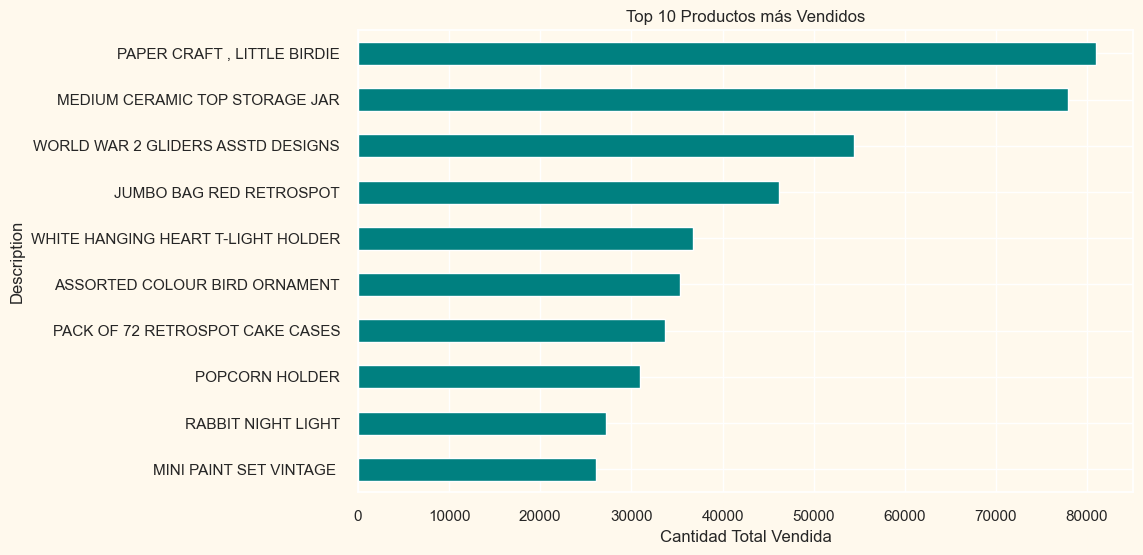

In [227]:
top_products = df_clean.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10, 6), color='teal')
plt.xlabel("Cantidad Total Vendida")
plt.title("Top 10 Productos más Vendidos")
plt.gca().invert_yaxis()
plt.show()

- Los productos más vendidos por cantidad son en su mayoría artículos decorativos o utilitarios pequeños.
- Se destacan:
  - `PAPER CRAFT , LITTLE BIRDIE`
  - `MEDIUM CERAMIC TOP STORAGE JAR`
- Este patrón indica una posible alta rotación en artículos económicos y de regalo.

### 🌍 **Distribución de Transacciones por País (Top 4)**

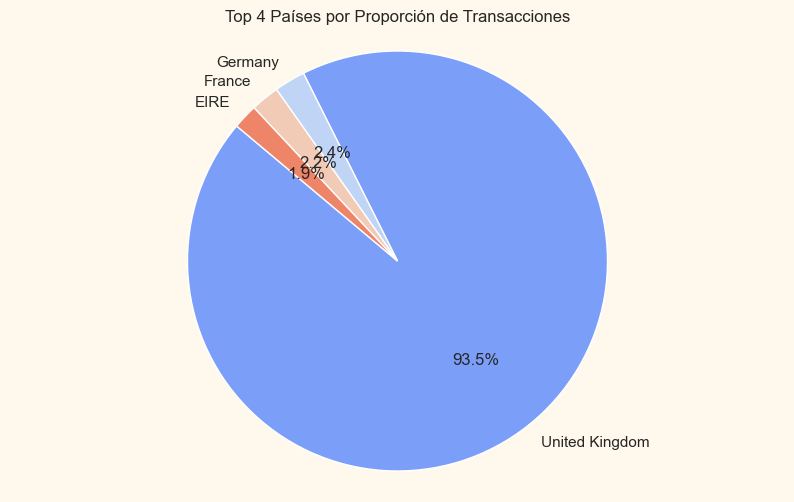

In [228]:
top4_countries = df_clean['Country'].value_counts().head(4)

plt.figure(figsize=(10, 6))
plt.pie(top4_countries.values, labels=top4_countries.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', 4))
plt.title("Top 4 Países por Proporción de Transacciones")
plt.axis('equal') 
plt.show()

- **United Kingdom** concentra el **93.5%** de todas las transacciones.
- Le siguen de forma marginal: **Germany**, **France** e **Irlanda**.
- Esta fuerte concentración valida el enfoque analítico exclusivo en Europa.

### 👥 **Clientes con Mayor Cantidad de Productos Comprados**

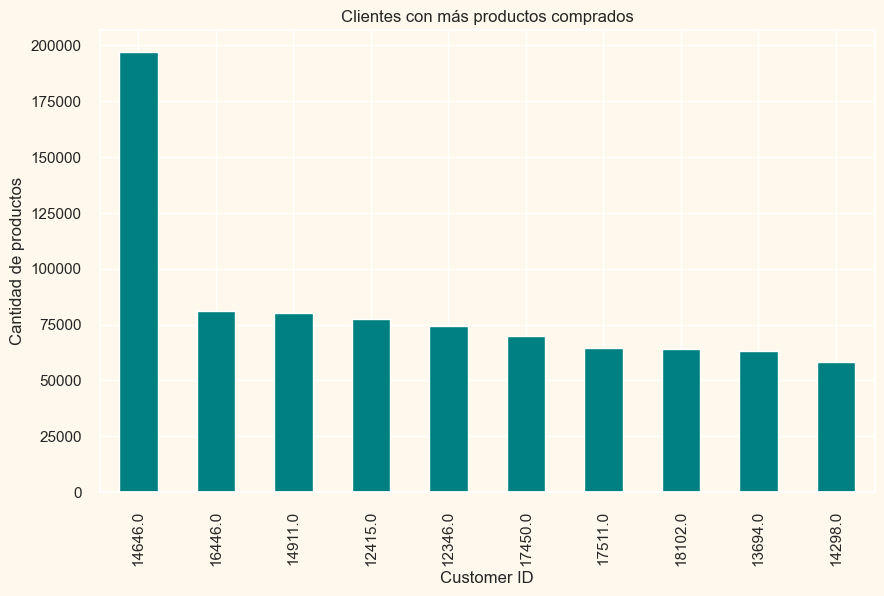

In [229]:
df_retail['CustomerID'] = df_clean['CustomerID'].astype('str')
prod_per_customer = df_clean.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)
prod_per_customer.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Clientes con más productos comprados')
plt.xlabel('Customer ID')
plt.ylabel('Cantidad de productos')
plt.show()

- Un grupo reducido de clientes realiza un volumen de compras significativamente superior.
- El cliente con ID `14646.0` supera ampliamente al resto.
- Se observa una **distribución altamente desbalanceada**, con fuerte presencia de clientes top.

### 🔁 **Frecuencia Mensual por Segmento de Gasto**

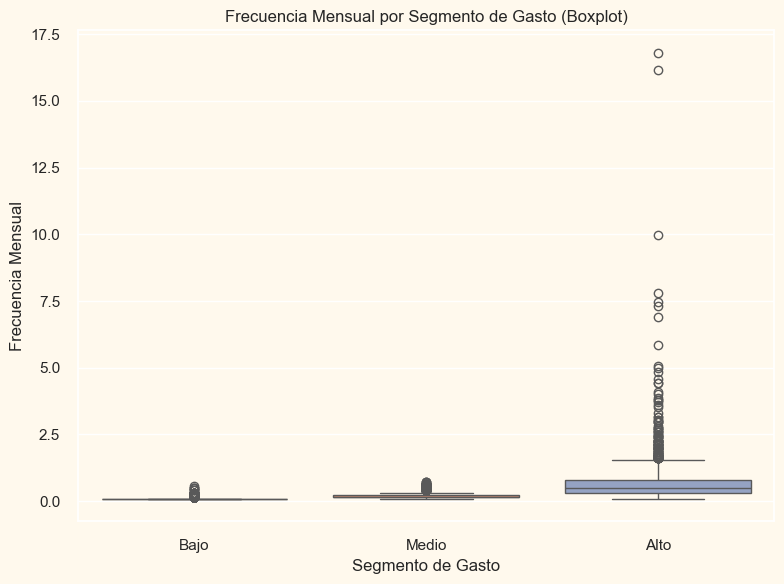

In [230]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_clientes, x='segmento_gasto', y='frecuencia_mensual', palette='Set2')
plt.title("Frecuencia Mensual por Segmento de Gasto (Boxplot)")
plt.xlabel("Segmento de Gasto")
plt.ylabel("Frecuencia Mensual")
plt.tight_layout()
plt.show()


- Los clientes del **segmento de gasto Alto** presentan mayor dispersión en la frecuencia de compra.
- Los segmentos **Medio** y **Bajo** se agrupan con frecuencias mucho más reducidas.
- Esto sugiere que el gasto alto no siempre implica alta frecuencia, pero sí mayor variabilidad en comportamiento.

### 🧩 **Distribución de Tipo de Cliente en Europa**

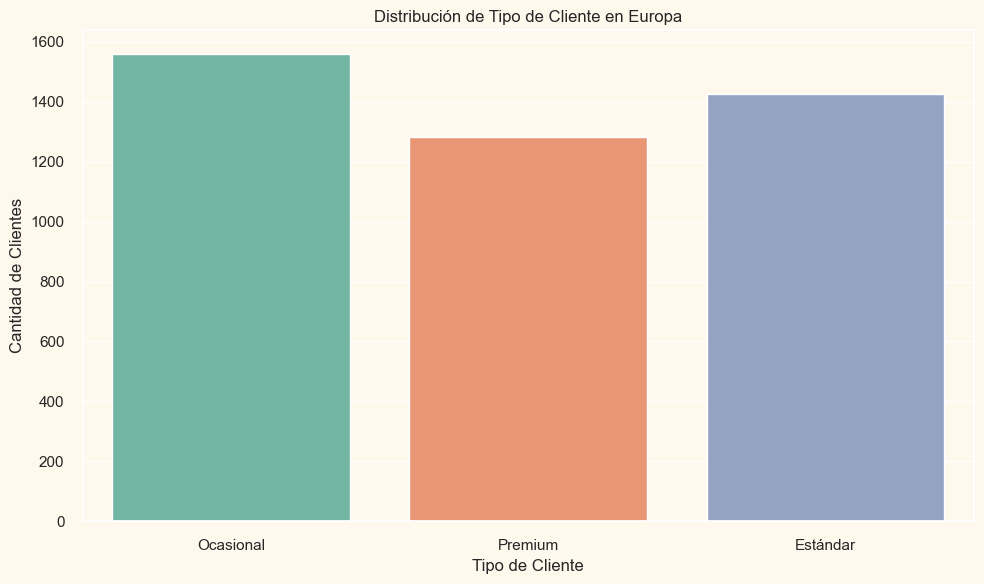

In [231]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clientes[df_clientes['continente'] == 'Europa'], x='tipo_cliente', palette='Set2')
plt.title("Distribución de Tipo de Cliente en Europa")
plt.xlabel("Tipo de Cliente")
plt.ylabel("Cantidad de Clientes")
plt.tight_layout()
plt.show()

- La mayoría de los clientes europeos se distribuyen entre:
  - **Ocasional**: ~40%
  - **Estándar**: ~35%
  - **Premium**: ~25%
- Esto indica que, si bien existe una base fiel de clientes recurrentes, el volumen está fuertemente impulsado por **clientes de compra ocasional**.


## ✅ Conclusión General
El análisis sugiere que la empresa se apoya principalmente en ventas de productos de bajo costo, distribuidos a través de un gran número de clientes esporádicos. Sin embargo, existe un subconjunto pequeño pero clave de **clientes de alto valor** que representan una proporción desproporcionada del volumen de ventas. Este grupo debería ser el foco de estrategias de retención y fidelización.


---

### →  Gráfico relativo de algunas características seleccionadas: Un subconjunto de datos

<Figure size 800x550 with 0 Axes>

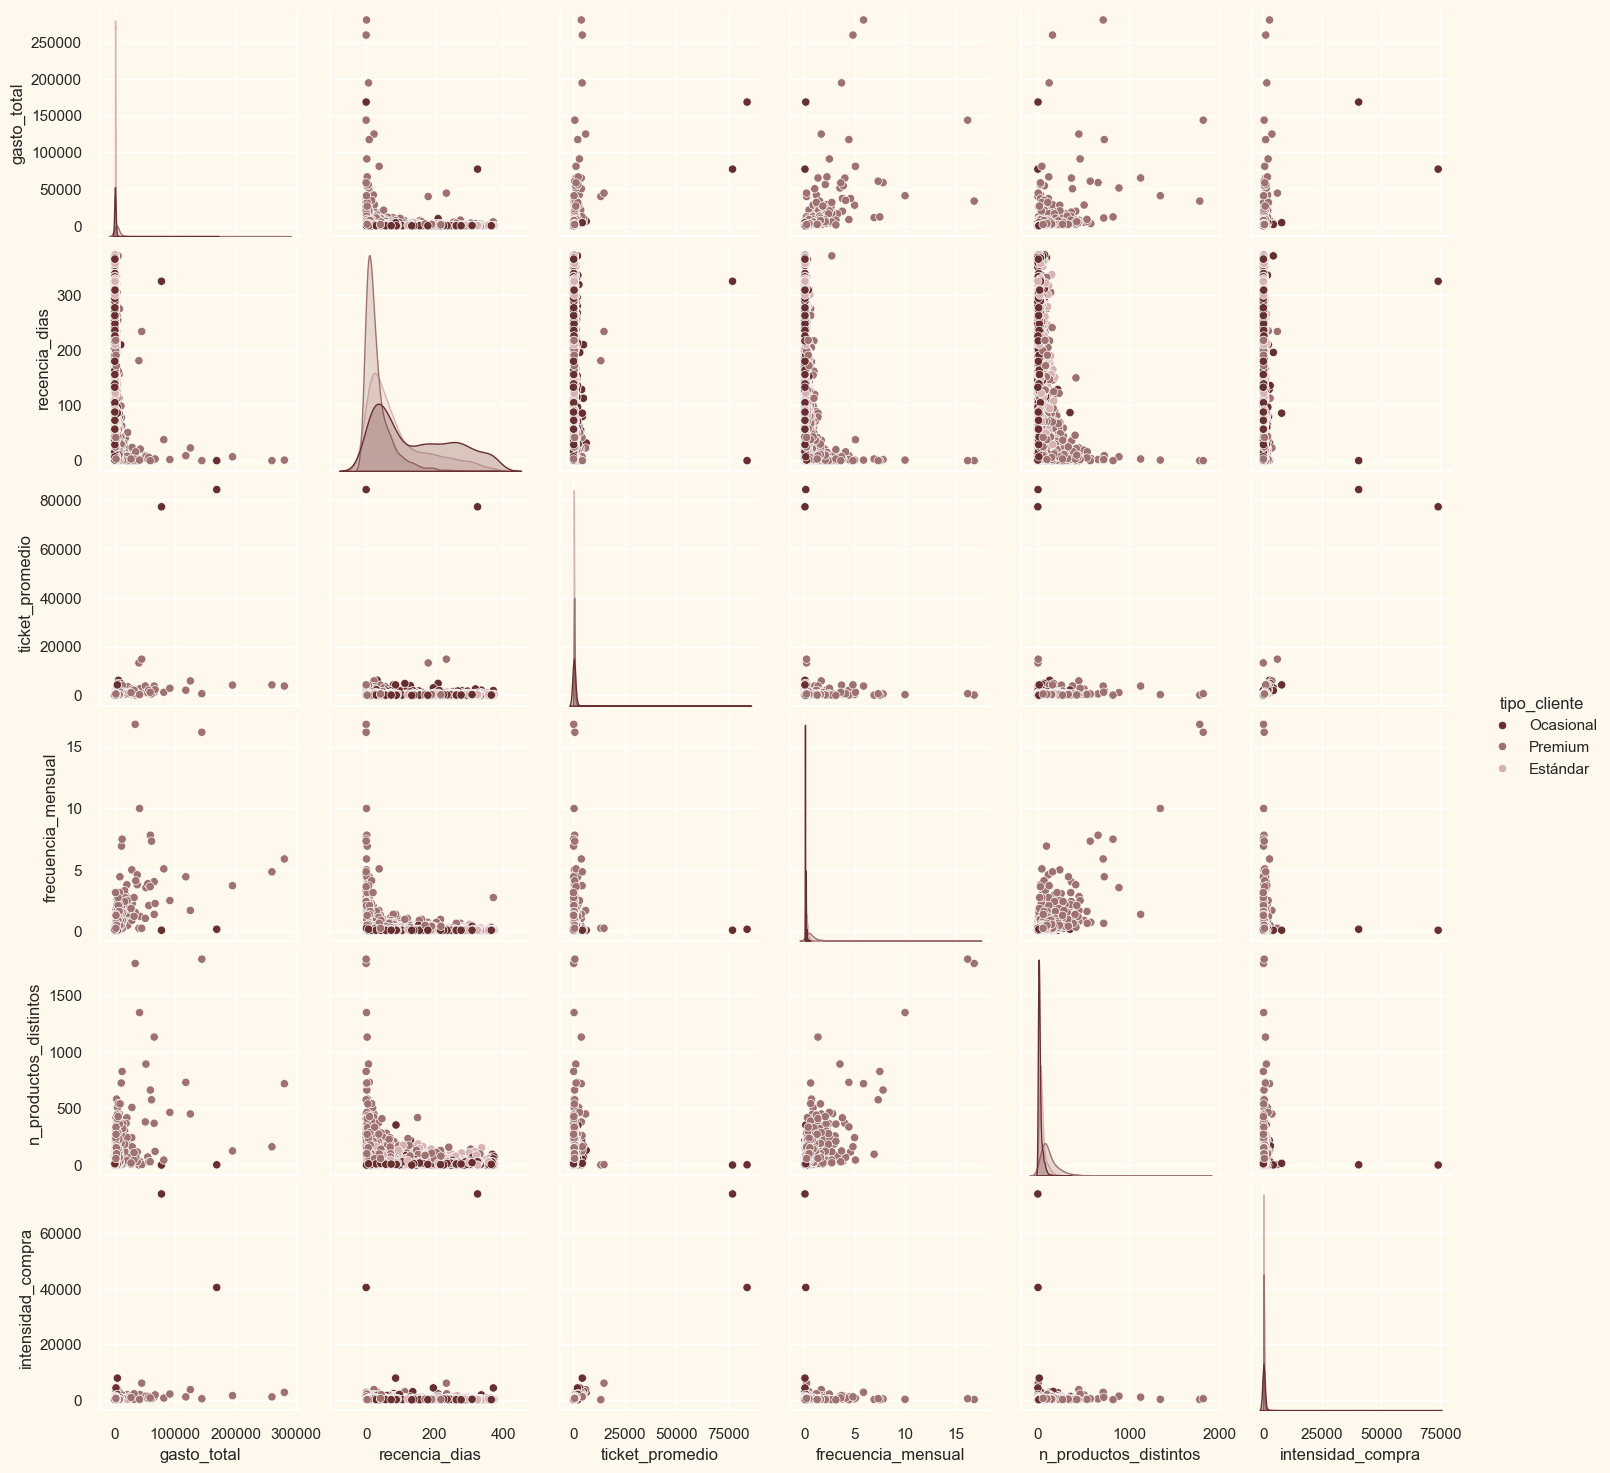

In [232]:
# Configuración de colores personalizada
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(pallet)

# Variables a graficar (revisá que existan en tu df_clientes)
To_Plot = ["gasto_total", "recencia_dias", "ticket_promedio", "frecuencia_mensual", "n_productos_distintos", "intensidad_compra"]

# Elegimos un hue que represente el perfil: tipo_cliente o segmento_gasto
plt.figure()
sns.pairplot(df_clientes[To_Plot + ["tipo_cliente"]], hue="tipo_cliente", palette=pallet)
plt.show()


## 📊 Conclusiones del Análisis Visual (Pairplot)

- **Distribuciones sesgadas**: La mayoría de las variables (como `gasto_total`, `ticket_promedio` e `intensidad_compra`) presentan una fuerte **asimetría positiva** (muchos clientes gastan poco y unos pocos gastan muchísimo). Esto sugiere la necesidad de escalar o transformar estas variables antes del clustering.

- **Agrupamientos difusos entre perfiles**:
  - No hay **fronteras claramente separadas** entre `tipo_cliente` (Premium, Estándar, Ocasional) en el espacio bidimensional. Los puntos están **superpuestos**, lo cual indica que los perfiles no son perfectamente distinguibles solo con estas variables.
  - Sin embargo, se observa cierta **tendencia de los clientes Premium** a concentrarse en niveles más altos de `gasto_total`, `ticket_promedio` y `frecuencia_mensual`.

- **Relación esperada entre variables**:
  - `ticket_promedio` y `gasto_total` tienen una **correlación positiva moderada** (a mayor gasto total, mayor ticket).
  - `recencia_dias` tiende a ser **más baja** en clientes con mayor frecuencia de compra, lo que tiene sentido: los clientes activos compraron más recientemente.

- **Outliers**:
  - Existen varios **clientes atípicos** con valores extremadamente altos en `gasto_total` o `ticket_promedio`. Es recomendable considerar **transformaciones logarítmicas** o tratarlos como **casos especiales** para no distorsionar la segmentación.

- **Variables útiles para clustering**:
  - Variables como `frecuencia_mensual`, `ticket_promedio`, `n_productos_distintos` e `intensidad_compra` muestran suficiente variabilidad como para ser **buenas candidatas** para segmentación no supervisada.

---

### →  Correlación entre variables

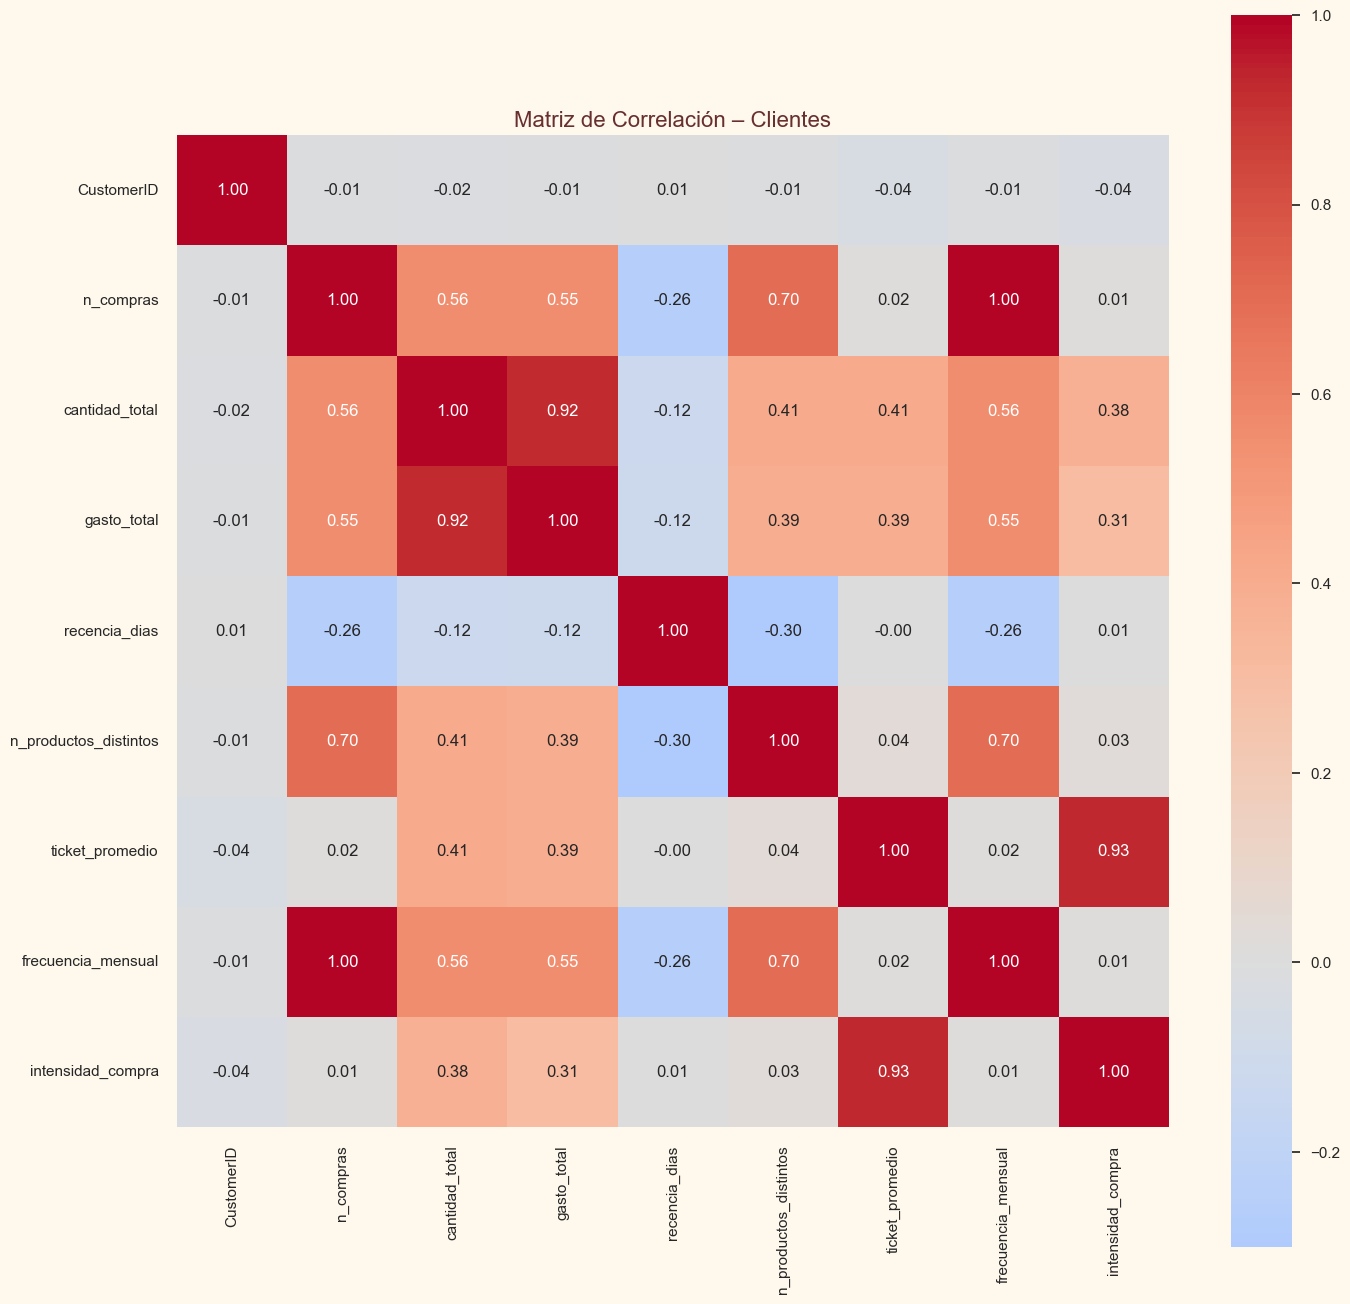

In [233]:
numeric_data = df_clientes.select_dtypes(include=[np.number])
corrmat = numeric_data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corrmat, annot=True, cmap="coolwarm", center=0, fmt=".2f", square=True)
plt.title("Matriz de Correlación – Clientes", fontsize=16, color="#682F2F")
plt.show()


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">PREPROCESAMIENTO DE LOS DATOS</p>

En esta sección, realizaré el preprocesamiento del dataset para preparar los datos antes de aplicar técnicas de **clustering**.

**Los pasos aplicados en esta etapa son:**

- 🔁 **Transformación logarítmica** en variables numéricas sesgadas para reducir la influencia de outliers y mejorar la simetría de las distribuciones.
- 🏷️ **Codificación de etiquetas** en las características categóricas, usando `LabelEncoder` para convertirlas a valores numéricos.
- 📏 **Escalado de las características** mediante `StandardScaler` para estandarizar los valores y asegurar que todas las variables tengan igual importancia.
- 📊 **Creación de un DataFrame escalado** (`scaled_df`), que va a ser usado para la reducción de dimensionalidad y posterior segmentación no supervisada.


In [234]:
# 1. Copiar el DataFrame original
data = df_clientes.copy()
# ❌ Eliminar 'CustomerID' y 'pais' antes de cualquier transformación
data = df_clientes.drop(columns=["CustomerID", "pais"])

## 🚫 ¿Por qué no incluir `CustomerID` en PCA o Clustering?

| Motivo                               | Justificación                                                                                                                              |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| ❌ **No representa comportamiento**   | Es un identificador arbitrario, no guarda relación con hábitos de compra, frecuencia, ni gasto.                                            |
| ❌ **Crea patrones artificiales**     | Si se incluye, puede influir erróneamente en la segmentación, ya que PCA o KMeans intentarán explicarlo como si fuera una variable válida. |
| ❌ **Tiene escala propia**            | Es un número grande sin sentido ordinal o continuo para el análisis.                                                                       |
| ✅ **Solo se usa como identificador** | Puede mantenerse en `df_clientes` original para visualizaciones o unir resultados, pero **debe excluirse del pipeline analítico**.         |




In [235]:
# 2. Variables numéricas sesgadas para la transformación logarítmica
log_cols = ['gasto_total', 'ticket_promedio', 'cantidad_total', 'intensidad_compra', 'n_productos_distintos']

# Aplico log1p para reducir sesgo y outliers
data[log_cols] = data[log_cols].apply(np.log1p)

In [236]:
# 3. Detección de columnas no numéricas (object, category, etc.)
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()
print("Columnas no numéricas que serán codificadas:", non_numeric_cols)

# Aplico LabelEncoder a las columnas no numéricas
LE = LabelEncoder()
for col in non_numeric_cols:
    data[col] = LE.fit_transform(data[col])

print("✅ Columnas no numéricas codificadas correctamente.")


Columnas no numéricas que serán codificadas: ['producto_top', 'segmento_gasto', 'continente', 'segmento_recencia', 'tipo_cliente']
✅ Columnas no numéricas codificadas correctamente.


## 🌍 ¿Por qué usar `continente` en lugar de `pais` para el LabelEncoder?

➡️ Usar `continente` es **más robusto, interpretable y eficiente** que `pais`.

| Motivo                           | Detalle                                                                             |
|----------------------------------|-------------------------------------------------------------------------------------|
| 🔢 **Baja cardinalidad**         | Solo 6 categorías → perfecto para aplicar `LabelEncoder` sin riesgo de sesgo.      |
| 🎯 **Generaliza comportamiento** | Agrupa mercados regionales con características comunes (Europa, Asia, América...). |
| 🧠 **Reduce ruido**              | Evitás que países con muy pocos registros (1–2 compras) distorsionen los clusters. |
| ⚙️ **Facilita interpretación**   | Más claro comparar resultados a nivel continental que entre 30+ países.            |

> ✅ Recomendación: **Usar `continente` en el pipeline de clustering/PCA** y dejar `pais` para análisis descriptivos o reportes detallados.


In [237]:
# 4. Escalado con StandardScaler
scaler = StandardScaler()
scaled_array = scaler.fit_transform(data)

# Crear DataFrame escalado
scaled_df = pd.DataFrame(scaled_array, columns=data.columns)

print("✅ Data escalado correctamente.")

✅ Data escalado correctamente.


In [238]:
print("✅ Transformaciones logarítmicas aplicadas a variables sesgadas.")
print("✅ Todas las variables están codificadas y escaladas.")
print("📊 DataFrame final listo para clustering o PCA:")
scaled_df.head()

✅ Transformaciones logarítmicas aplicadas a variables sesgadas.
✅ Todas las variables están codificadas y escaladas.
📊 DataFrame final listo para clustering o PCA:


,n_compras,cantidad_total,gasto_total,producto_top,recencia_dias,n_productos_distintos,ticket_promedio,frecuencia_mensual,intensidad_compra,segmento_gasto,continente,segmento_recencia,tipo_cliente
0,-0.425097,3.816653,3.706225,0.250474,2.334574,-2.525776,7.523483,-0.425097,6.828298,-1.224745,-0.069253,-1.226527,0.040850
1,0.354417,1.329485,1.411843,-0.059928,-0.905340,0.961635,1.038408,0.354417,0.905794,-1.224745,-0.069253,1.215830,1.297636
2,-0.035340,1.293900,0.716489,-0.617444,-0.175360,-0.370134,0.616141,-0.035340,1.469974,-1.224745,-0.069253,-0.005349,1.297636
3,-0.425097,0.337734,0.698739,1.368521,-0.735345,0.661260,2.445437,-0.425097,1.553147,-1.224745,-0.069253,1.215830,0.040850
4,-0.425097,-0.509484,-0.618962,1.407698,2.174578,-0.586482,0.220538,-0.425097,0.268494,0.000000,-0.069253,-1.226527,0.040850


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">REDUCCIÓN DE DIMENSIONALIDAD</p>

En este problema, hay muchos factores (atributos o características) sobre los cuales se va a hacer la clasificación final. Cuantas más características haya, más difícil va a ser trabajar con ellas. Muchas de estas características están correlacionadas y, por lo tanto, son redundantes. Es por eso que voy a hacer una **reducción de dimensionalidad** sobre las características seleccionadas antes de pasar a la parte de clustering.

> *La reducción de dimensionalidad es el proceso de reducir el número de variables aleatorias bajo consideración, obteniendo un conjunto de variables principales.*

---

### 🧠 ¿Qué es PCA?

**El Análisis de Componentes Principales (PCA)** es una técnica para reducir la dimensionalidad de conjuntos de datos de este tipo, aumentando la interpretabilidad pero al mismo tiempo minimizando la pérdida de información.

### ✨ Pasos en esta sección:

- Reducción de dimensionalidad con PCA
- Visualización del dataframe reducido en 3D


### 🔽 Reducción de dimensionalidad con PCA

Para este proyecto, voy a reducir las dimensiones a **3 componentes principales**.


In [239]:
# Reducción a 3 dimensiones
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=["PCA1", "PCA2", "PCA3"])

# Estadísticas descriptivas
PCA_df.describe().T


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,count,mean,std,min,25%,50%,75%,max
PCA1,4338.0,-3.931080e-17,2.303215,-7.324370,-1.557199,-0.523709,1.784714,21.184896
PCA2,4338.0,1.310360e-17,1.361343,-19.404207,-0.768397,0.030399,0.831409,8.646892
PCA3,4338.0,3.275900e-17,1.212551,-2.579753,-1.018761,-0.006904,0.881023,4.507231


In [263]:
fig = px.scatter_3d(
    PCA_df,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    color_discrete_sequence=["maroon"],
    opacity=0.7
)

fig.update_layout(
    title="Proyección 3D de los datos tras PCA",
    scene=dict(
        xaxis_title="PCA1",
        yaxis_title="PCA2",
        zaxis_title="PCA3"
    ),
    width=800,
    height=600,
    #template="plotly_dark"
)

fig.show()


In [241]:
'''
# Gráfico 3D de la proyección PCA
x = PCA_df["PCA1"]
y = PCA_df["PCA2"]
z = PCA_df["PCA3"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c="maroon", marker="o", alpha=0.6)
ax.set_title("Proyección 3D de los datos tras PCA")
plt.show()
'''

'\n# Gráfico 3D de la proyección PCA\nx = PCA_df["PCA1"]\ny = PCA_df["PCA2"]\nz = PCA_df["PCA3"]\n\nfig = plt.figure(figsize=(10, 8))\nax = fig.add_subplot(111, projection="3d")\nax.scatter(x, y, z, c="maroon", marker="o", alpha=0.6)\nax.set_title("Proyección 3D de los datos tras PCA")\nplt.show()\n'

## 📉 ¿Por qué aplicamos reducción de dimensionalidad (PCA)?

Aunque el dataset ya está escalado (`scaled_df`), aplicar PCA sigue siendo recomendable en clustering no supervisado por las siguientes razones:

- ✅ **Reduce redundancia**: Elimina correlaciones entre variables como `gasto_total` y `ticket_promedio` (duplicidad).
- ✅ **Mejora visualización**: Permite representar los datos en 2D o 3D y validar visualmente la segmentación.
- ✅ **Acelera el cálculo**: Reduce la dimensionalidad conservando la mayor parte de la información.
- ✅ **Optimiza el clustering**: Algoritmos como KMeans funcionan mejor con variables no correlacionadas.

> 🔎 Aunque no es obligatorio, **PCA mejora la interpretabilidad y eficiencia del clustering** en la mayoría de los casos.


## 🎯 ¿Por qué elegí 3 componentes principales con PCA?

Se seleccionaron **3 componentes principales** porque:

- 📉 Juntas explican una **alta proporción de la varianza total** (mayor al umbral típico del 80%-90%).
- 🎥 Permiten realizar una **visualización 3D interactiva**, clave para explorar visualmente los clusters y validar su estructura.
- 🧠 Representan un **buen compromiso** entre simplificación del espacio y retención de información útil.

> ➕ Usar más componentes (4 o 5) puede agregar complejidad sin mejorar significativamente la interpretación.  
> ➖ Usar menos (2) puede perder información relevante para la segmentación.


## 📊 Conclusiones de la Proyección 3D tras PCA

La técnica de PCA logró condensar la información de múltiples variables en 3 componentes principales, facilitando la visualización y permitiendo una representación compacta del comportamiento de los clientes.

- 📌 **Concentración fuerte en el centro**: La mayoría de los puntos se concentran en una zona central del gráfico, lo cual indica que muchos clientes comparten características similares en las variables que fueron consideradas. Esto sugiere la existencia de un segmento dominante.

- 🌪️ **Presencia de dispersión**: A pesar de la concentración central, hay una dispersión leve en distintas direcciones, lo cual podría estar indicando la presencia de otros grupos de clientes con comportamientos atípicos o diferenciados.



In [242]:
# Obtener las cargas (loadings) de cada variable en cada componente
pca_components = pd.DataFrame(
    pca.components_,  # matriz de pesos
    columns=scaled_df.columns,  # nombres de variables originales
    index=["PCA1", "PCA2", "PCA3"]
).T  # transponer para mayor claridad

pca_components

,PCA1,PCA2,PCA3
n_compras,0.290871,-0.358678,0.024469
cantidad_total,0.401834,0.179176,-0.003423
gasto_total,0.402856,0.123547,0.022664
producto_top,0.029040,-0.040521,-0.020632
recencia_dias,-0.243467,0.109307,0.552492
n_productos_distintos,0.324794,0.080368,-0.120622
ticket_promedio,0.262863,0.500335,0.127626
frecuencia_mensual,0.290871,-0.358678,0.024469
intensidad_compra,0.265084,0.510752,0.067873
segmento_gasto,-0.266854,0.233659,-0.442821


## 🧠 Interpretación de Componentes Principales (PCA)


### 🔹 **PCA1 — "Volumen y diversidad de compra"**

Variables con mayor peso positivo:
- `gasto_total` → **0.40**
- `cantidad_total` → **0.40**
- `n_productos_distintos` → **0.32**
- `n_compras` y `frecuencia_mensual` → **0.29**
- `intensidad_compra` → **0.27**
- `ticket_promedio`, `tipo_cliente` → **~0.26**

🔎 Esta componente resume a clientes con **alto poder adquisitivo**, **variedad de productos** y **frecuencia de compra**. Es un eje claro de **valor total aportado**.


### 🔹 **PCA2 — "Valor por compra vs. frecuencia"**

Variables destacadas:
- `intensidad_compra` → **0.51**
- `ticket_promedio` → **0.50**
- `segmento_gasto` → **0.23**
- Valores negativos fuertes en:
  - `n_compras` y `frecuencia_mensual` → **-0.36**

🔎 Contrapone **compradores que hacen pocas compras pero de alto valor** (intensos por transacción) frente a los **frecuentes con tickets menores**. Captura un **comportamiento opuesto** al eje anterior.

### 🔹 **PCA3 — "Recencia y comportamiento atípico"**

Variables con mayor peso (positiva y negativa):
- `recencia_dias` → **0.55**
- `tipo_cliente` → **0.42**
- `segmento_recencia` → **-0.52**
- `segmento_gasto` → **-0.44**

🔎 Este componente representa el **tiempo desde la última compra** y **atributos latentes de segmentación**. Captura **clientes inactivos o especiales**, tanto en términos de gasto como de comportamiento reciente.


### ✅ Conclusión

- **PCA1** → volumen, variedad y valor económico del cliente  
- **PCA2** → intensidad por compra vs. frecuencia  
- **PCA3** → recencia y rasgos de segmentación atípicos

Cada eje PCA condensa **comportamientos distintos del cliente**, lo que justifica plenamente su uso para clustering.


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Con las dimensiones reducidas mediante PCA, voy a aplicar técnicas de **clustering no supervisado** para segmentar a los clientes.  
Los tres algoritmos a implementar para comparar resultados son:

1. **KMeans**
2. **Agglomerative Clustering**
3. **DBSCAN**

---


## **K-Means**

El algoritmo **KMeans** divide los datos en un número definido de grupos, minimizando la distancia interna de cada punto con respecto al centroide de su grupo.  
Primero voy a determinar el número óptimo de clusters utilizando el **método del codo (elbow method)**.

📐 Método del Codo (KMeans):


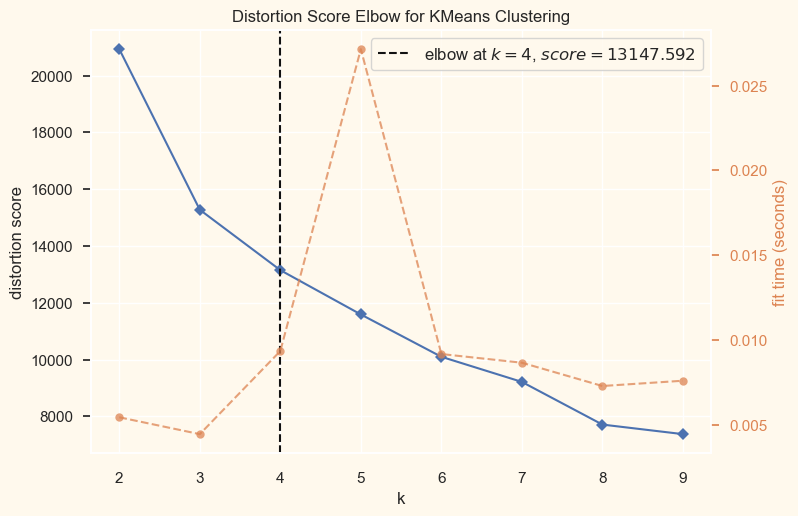

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [243]:
# Método del Codo
print("📐 Método del Codo (KMeans):")
elbow_model = KElbowVisualizer(KMeans(random_state=42), k=(2,10))
elbow_model.fit(PCA_df)
elbow_model.show()

In [244]:
# Clustering con KMeans usando el número óptimo de clusters
optimal_k = elbow_model.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
yhat_kmeans = kmeans.fit_predict(PCA_df)

# Agregar clusters al DataFrame
PCA_df["cluster_kmeans"] = yhat_kmeans

---

## **Agglomerative**

El algoritmo **Agglomerative Clustering** forma grupos jerárquicos mediante la fusión progresiva de observaciones similares.  
Voy a usar el mismo número de clusters sugerido por el método del codo.


In [245]:
agg_model = AgglomerativeClustering(n_clusters=optimal_k)
yhat_agg = agg_model.fit_predict(PCA_df)

# Asignar al DataFrame
PCA_df["cluster_agg"] = yhat_agg

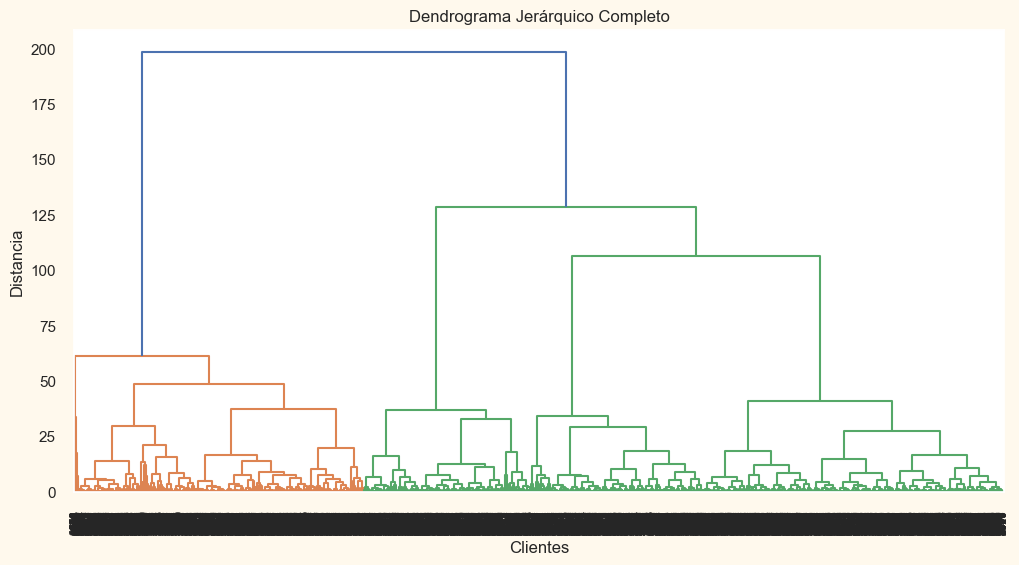

In [246]:
# En este caso uso PCA_df, pero puedo usar scaled_df (según lo que quiera mostrar jerárquicamente)
mergings = linkage(PCA_df, method='ward')  # otras opciones a usar son: 'complete', 'average', 'centroid'

# Dendrograma completo (más pesado si tenés muchos clientes)
plt.figure(figsize=(12, 6))
dendrogram(mergings, leaf_rotation=90, leaf_font_size=8)
plt.title("Dendrograma Jerárquico Completo")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()


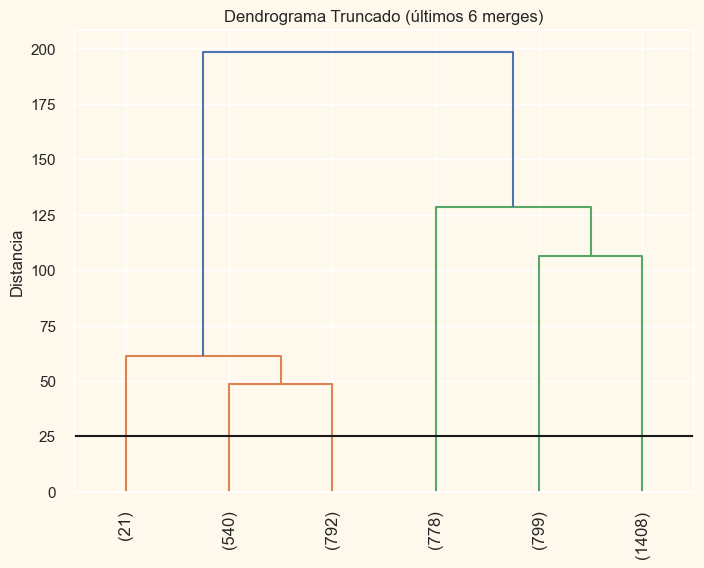

In [247]:
plt.figure(figsize=(8, 6))
dendrogram(mergings,
           truncate_mode='lastp',
           p=6,
           leaf_rotation=90,
           leaf_font_size=12,
)
plt.axhline(y=25, c='k')  # línea horizontal para sugerir corte en clusters
plt.title("Dendrograma Truncado (últimos 6 merges)")
plt.ylabel("Distancia")
plt.show()


## 🌿 Dendrograma Jerárquico (Truncado)

El dendrograma es una herramienta visual que permite observar la estructura jerárquica del agrupamiento aglomerativo.  
En este caso, se utiliza el **modo truncado** para mostrar únicamente los **últimos 6 agrupamientos significativos**, lo que facilita la interpretación.

### 📌 Observaciones clave:

- Cada número en la base representa el **tamaño del grupo fusionado** (por ejemplo, `(1408)` indica que ese nodo agrupa 1.408 clientes).
- La **altura de las uniones verticales** representa la **distancia (o disimilitud)** entre los clústeres fusionados.
- Una línea horizontal (por ejemplo, a **y = 25**) puede utilizarse como **criterio visual de corte**, indicando que si se corta allí, se obtendrían aproximadamente **5 clústeres distintos**.
- Se puede ver que hay dos grandes ramas principales, lo cual sugiere que existen **dos segmentos muy diferentes entre sí**, y dentro de ellos, subgrupos bien definidos:
  - Una rama con grupos de tamaños **21**, **540**, **792**
  - Otra con **778**, **799**, **1408**


### ✅ Conclusión:

Este dendrograma justifica adecuadamente la elección de **4 o 5 clústeres** como valor razonable para `n_clusters` en el modelo `AgglomerativeClustering`.  
Además, refuerza la idea de que los datos tienen una **estructura jerárquica bien definida**, lo que hace que este tipo de clustering sea apropiado para el caso.


---

## **DBSCAN**


**DBSCAN** es un algoritmo de clustering basado en densidad. Es especialmente útil cuando los grupos no tienen una forma esférica o contienen ruido.  
Los puntos con poca densidad se marcan como outliers (`-1`).


In [248]:
# Ajustar modelo DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
yhat_dbscan = dbscan.fit_predict(PCA_df)

# Asignar resultados
PCA_df["cluster_dbscan"] = yhat_dbscan

---

## **Comparativa Visual**

In [ ]:
# Configuración
cluster_methods = ["cluster_kmeans", "cluster_agg", "cluster_dbscan"]
titles = ["KMeans", "Agglomerative", "DBSCAN"]
palettes = px.colors.qualitative.Set2

# Crear figura con 1 fila y 3 columnas
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type': 'scene'}, {'type': 'scene'}, {'type': 'scene'}]],
    subplot_titles=titles,
    horizontal_spacing=0.05  # reduce el espacio entre plots
)

# Agregar cada gráfico como un trace
for i, method in enumerate(cluster_methods):
    fig.add_trace(
        go.Scatter3d(
            x=PCA_df["PCA1"],
            y=PCA_df["PCA2"],
            z=PCA_df["PCA3"],
            mode='markers',
            marker=dict(
                size=2.5,  # más pequeño para mayor claridad
                color=PCA_df[method],
                colorscale='Viridis',
                opacity=0.75,
                showscale=False
            ),
            name=titles[i]
        ),
        row=1,
        col=i+1
    )

# Ajustar layout
fig.update_layout(
    height=500,
    width=1400,
    title_text="Comparación 3D de Clustering por Método",
    showlegend=False,
    margin=dict(l=20, r=20, t=50, b=20)
)

# Etiquetas de ejes para cada escena
for i in range(1, 4):
    fig.update_scenes(
        dict(
            xaxis_title="PCA1",
            yaxis_title="PCA2",
            zaxis_title="PCA3"
        ),
        row=1,
        col=i
    )

fig.show()


In [265]:
'''
palettes = ["Set2", "Set1", "Paired"]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, method in enumerate(cluster_methods):
    sns.scatterplot(
        x=PCA_df["PCA1"],
        y=PCA_df["PCA2"],
        hue=PCA_df[method],
        palette=palettes[i],
        s=50,
        alpha=0.7,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f"Clustering con {titles[i]}")
    axes[i].set_xlabel("PCA1")
    axes[i].set_ylabel("PCA2")

plt.tight_layout()
plt.show()
'''

'\npalettes = ["Set2", "Set1", "Paired"]\n\nfig, axes = plt.subplots(1, 3, figsize=(20, 6))\n\nfor i, method in enumerate(cluster_methods):\n    sns.scatterplot(\n        x=PCA_df["PCA1"],\n        y=PCA_df["PCA2"],\n        hue=PCA_df[method],\n        palette=palettes[i],\n        s=50,\n        alpha=0.7,\n        ax=axes[i],\n        legend=False\n    )\n    axes[i].set_title(f"Clustering con {titles[i]}")\n    axes[i].set_xlabel("PCA1")\n    axes[i].set_ylabel("PCA2")\n\nplt.tight_layout()\nplt.show()\n'

## 📊 Comparación 3D de Métodos de Clustering (PCA1, PCA2 y PCA3)

#### 🔹 KMeans
- Crea **clústeres esféricos bien distribuidos** en el espacio tridimensional.
- Muestra una **diferenciación clara** entre grupos.
- Excelente para segmentación operativa de clientes en grupos accionables.

#### 🔸 Agglomerative Clustering
- Detecta una **estructura similar a KMeans** en el espacio PCA.
- Clústeres algo más compactos y con **transiciones más abruptas** entre grupos.
- También permite observar jerarquías implícitas.

#### ⚠️ DBSCAN
- Encuentra estructuras similares, pero:
  - Presenta un clúster dominante y varios **outliers dispersos** (puntos que no pertenecen a ningún grupo).
  - Útil para identificar **clientes con patrones de compra atípicos o extremos**.

#### ✅ Conclusión General

- **KMeans**: el más adecuado para segmentar masivamente en campañas.
- **Agglomerative**: buen complemento para identificar jerarquías entre perfiles.
- **DBSCAN**: ideal para detección de casos excepcionales, como clientes VIP o anomalías.

> ➡️ Recomendación: combinar **KMeans** para la base de segmentación y **DBSCAN** para refinar estrategias dirigidas a comportamientos fuera de lo común.


---

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUACIÓN DE MODELOS</p>

Dado que este es un problema de **clustering no supervisado**, no contamos con etiquetas verdaderas para evaluar el rendimiento de forma clásica.  
Por lo tanto, voy a evaluar la **calidad y utilidad de los clusters formados** mediante análisis exploratorio y visual.


## 🎯 Objetivo de esta sección:

- Ver cómo se distribuyen los clientes en los clusters formados
- Analizar las variables clave como gasto, recencia, ticket promedio y frecuencia
- Identificar si hay patrones útiles o perfiles destacables en los grupos


In [251]:
# Unir los clusters desde PCA_df a df_clientes por índice
df_clientes = df_clientes.copy()
df_clientes[["cluster_kmeans", "cluster_agg", "cluster_dbscan"]] = PCA_df[["cluster_kmeans", "cluster_agg", "cluster_dbscan"]].values

In [252]:
pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]

---

## 1) Contador de distribución por método

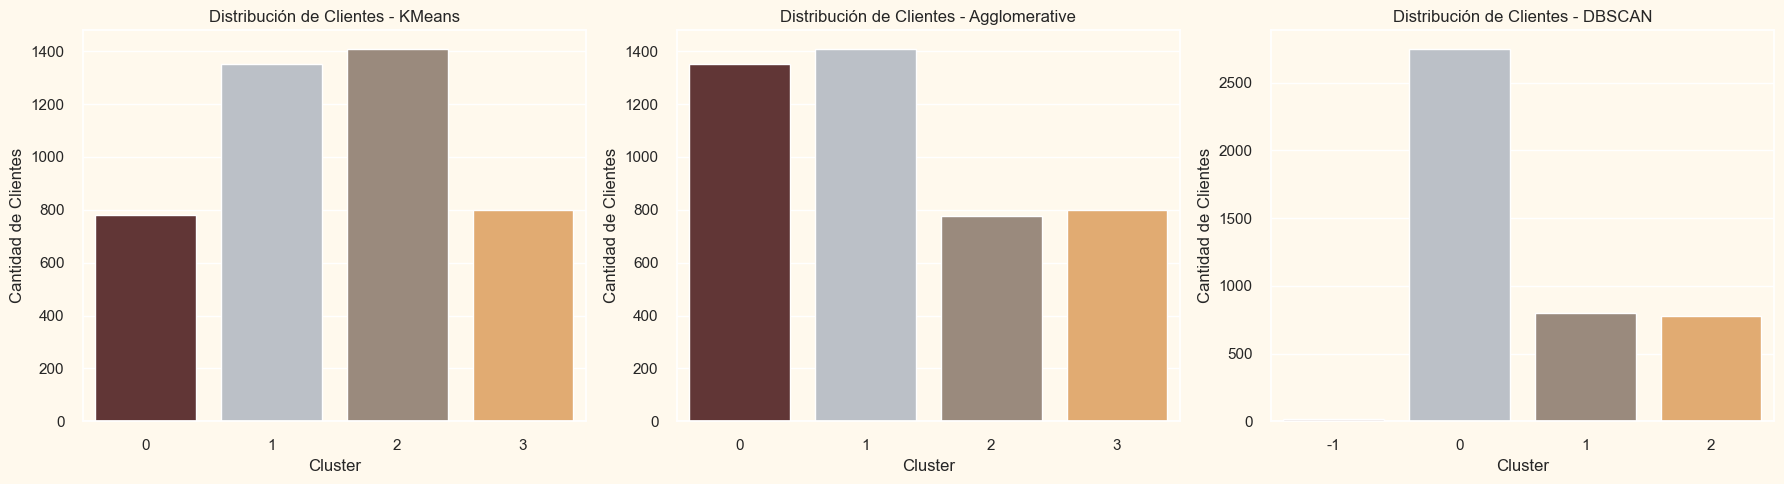

In [253]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(cluster_methods):
    sns.countplot(x=df_clientes[method], palette=pal, ax=axes[i])
    axes[i].set_title(f"Distribución de Clientes - {titles[i]}")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel("Cantidad de Clientes")

plt.tight_layout()
plt.show()



#### 🔹 KMeans
- Crea **4 grupos balanceados**.
- Los clústeres 1 y 2 concentran la mayor parte de los clientes.
- 🔎 Segmentación estable y útil para campañas diferenciadas.
- ✅ **Ideal para agrupaciones masivas con tamaños similares**.

#### 🔸 Agglomerative Clustering
- También forma 4 clústeres con una distribución razonable.
- Ligeramente más desbalanceado que KMeans, con clústeres 0 y 1 dominantes.
- 🧱 Útil cuando se quiere entender jerarquías o similitudes progresivas entre clientes.

#### ⚠️ DBSCAN
- Tiene un gran grupo central (clúster 0), y dos más pequeños (1 y 2).
- Detecta outliers (`-1`), aunque en este caso son **pocos o nulos**.
- 🔍 Buen método para detectar comportamientos anómalos o fuera de patrón.
- ❗ No genera una distribución balanceada, lo que lo hace menos apto para segmentación uniforme.

#### ✅ Conclusión General

- **KMeans** → Mejor para segmentación equilibrada y marketing operativo.
- **Agglomerative** → Bueno para análisis jerárquico o relacional.
- **DBSCAN** → Útil para detección de outliers o perfiles extremos no representativos.

> Recomendación: usar **KMeans como base**, y **DBSCAN como método complementario** para identificar perfiles fuera del patrón.


---

## 2) Análisis de variables clave por cluster

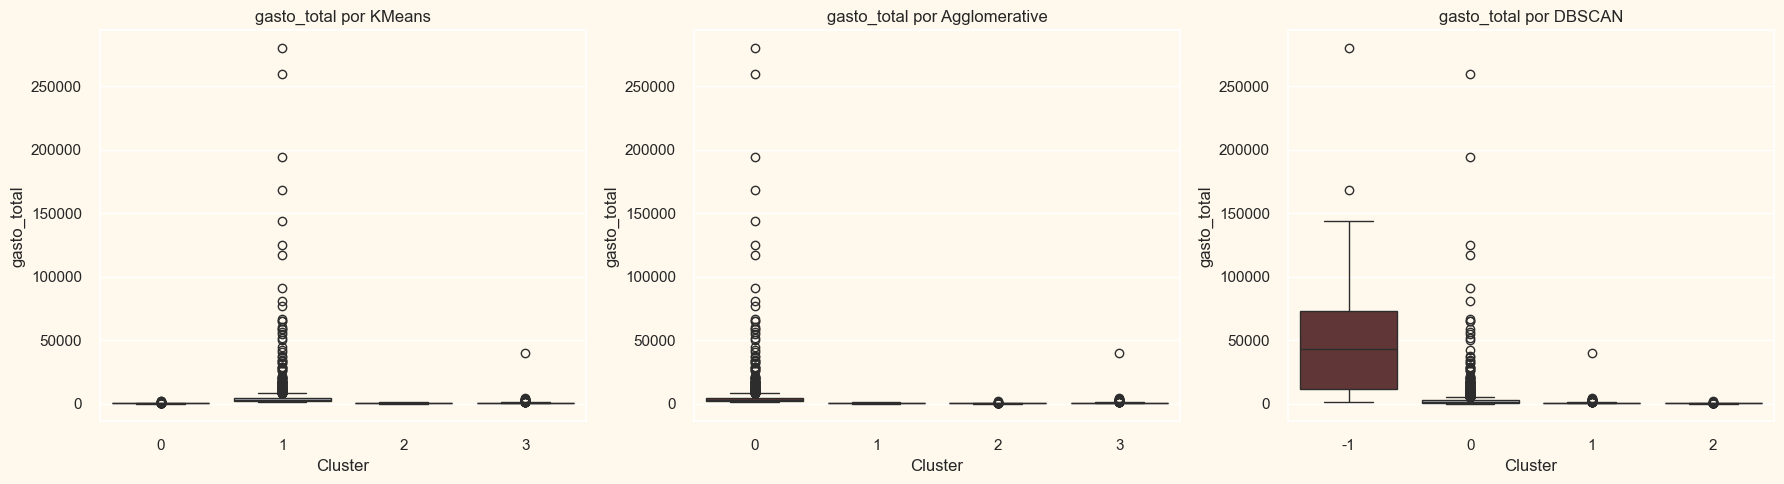

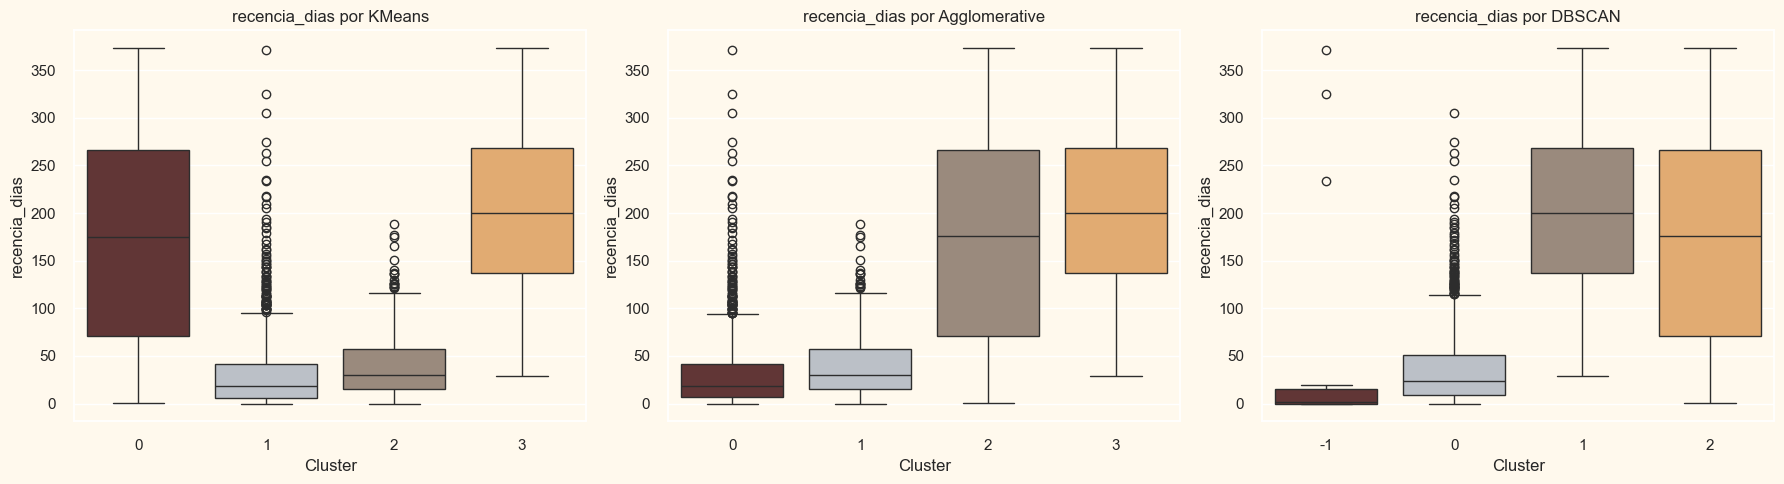

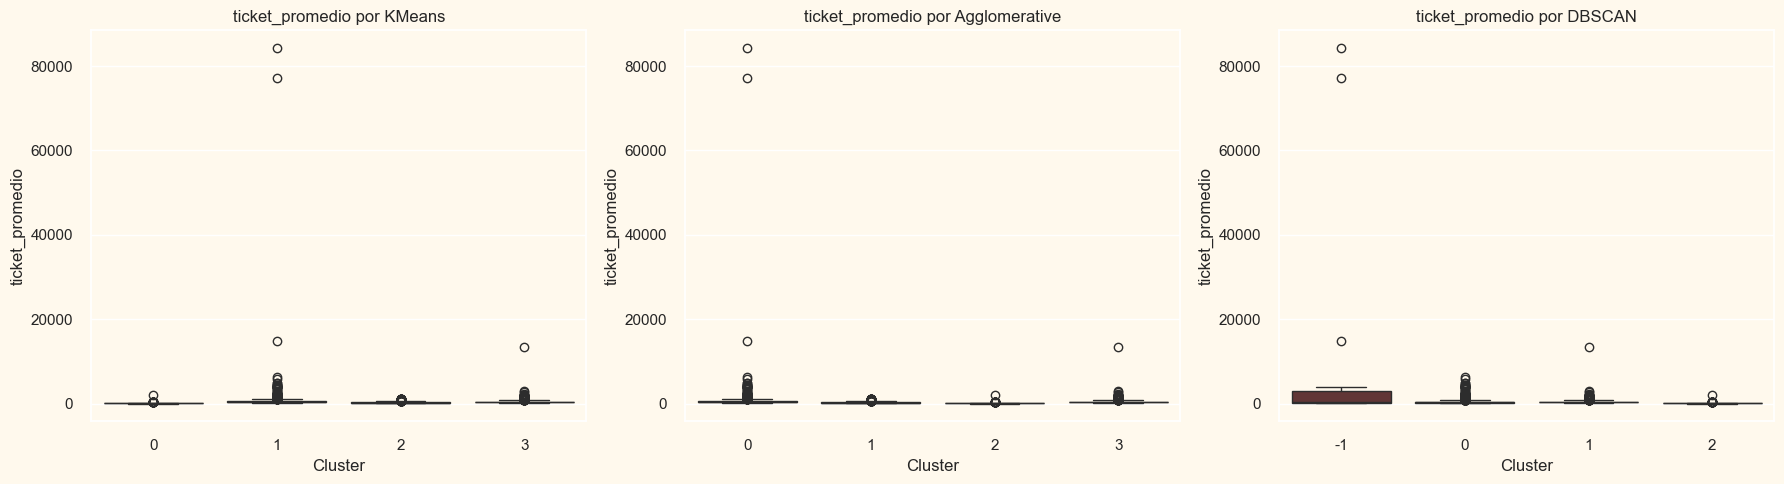

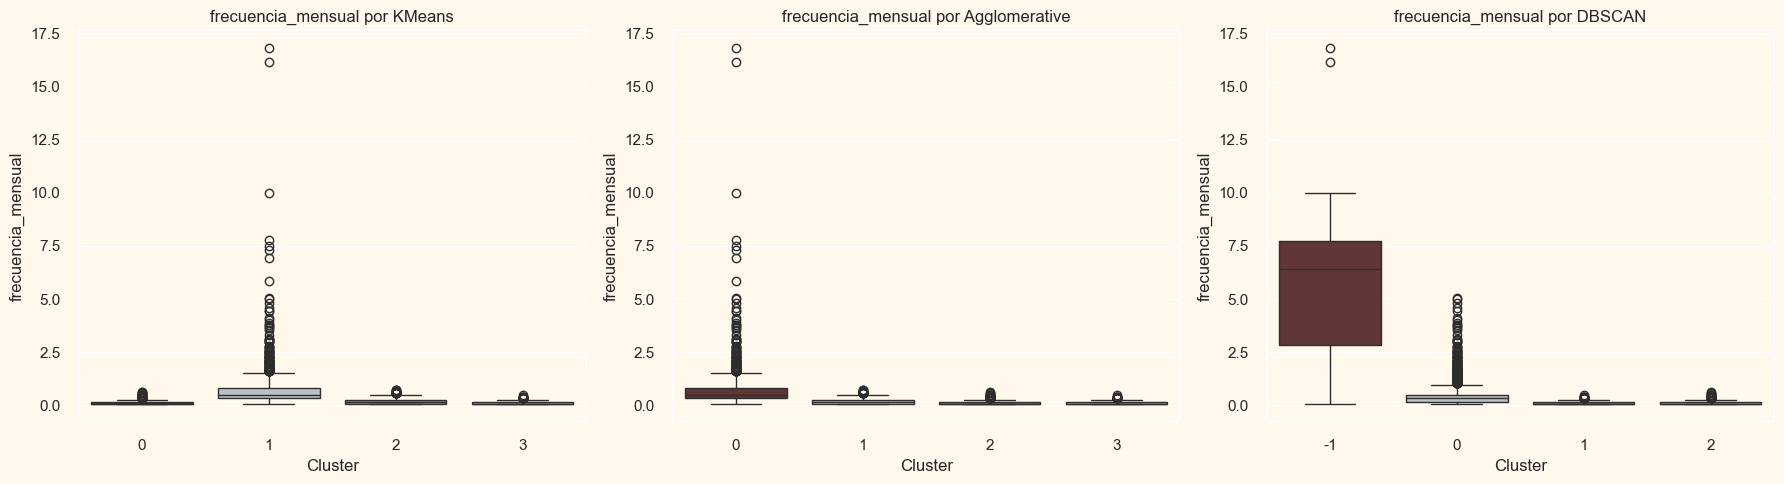

In [254]:
variables = ["gasto_total", "recencia_dias", "ticket_promedio", "frecuencia_mensual"]

for var in variables:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for i, method in enumerate(cluster_methods):
        sns.boxplot(data=df_clientes, x=method, y=var, palette=pal, ax=axes[i])
        axes[i].set_title(f"{var} por {titles[i]}")
        axes[i].set_xlabel("Cluster")
        axes[i].set_ylabel(var)
    plt.tight_layout()
    plt.show()


## 💰 Comparación de Clústeres según Gasto Total

La variable `gasto_total` es clave para identificar a los **clientes de mayor valor** en términos económicos. Esta comparación revela cómo cada algoritmo segmenta a los grandes compradores.


#### 🔹 KMeans
- El **clúster 1** concentra casi todos los **clientes de alto gasto**, incluyendo a los **outliers extremos**.
- Los clústeres 0, 2 y 3 agrupan clientes con bajo gasto.
- ✅ Excelente capacidad para **aislar clientes premium**.
- ✅ Ideal para **acciones de fidelización y retención**.


#### 🔸 Agglomerative Clustering
- Los grandes compradores están mayormente en el **clúster 0**, aunque menos agrupados que en KMeans.
- El resto de los clústeres contienen perfiles de gasto más homogéneo y bajo.
- ⚠️ Logra separar bien el gasto alto, pero con **menor claridad visual**.
- ❗ Menor equilibrio entre los grupos.


#### ⚠️ DBSCAN
- El clúster `-1` (outliers) incluye a **todos los clientes de gasto extremo**.
- Los demás clústeres (0, 1 y 2) contienen perfiles de gasto **bajo y muy similares entre sí**.
- ✅ Muy útil para **detectar valores atípicos**.
- ❌ No es útil para segmentaciones balanceadas si se busca aplicar estrategias generales.

#### ✅ Conclusión

| Algoritmo       | Capacidad para detectar alto gasto | Balance entre clústeres | Útil para…                           |
|-----------------|-------------------------------------|--------------------------|---------------------------------------|
| **KMeans**      | ⭐ Muy buena                        | ✅ Sí                    | Campañas personalizadas               |
| **Agglomerative**| 👍 Aceptable                        | ⚠️ Menor balance         | Análisis jerárquico, segmentación leve|
| **DBSCAN**      | 🔍 Detecta outliers bien            | ❌ No                    | Detección de extremos y anomalías     |

> 🔽 Recomendación: **Usar KMeans** como base para segmentar clientes de alto valor y **complementar con DBSCAN** para aislar clientes atípicos (VIP, riesgo, etc).


---

## 3) Scatterplot de pares clave (PCA opcional o variables originales)


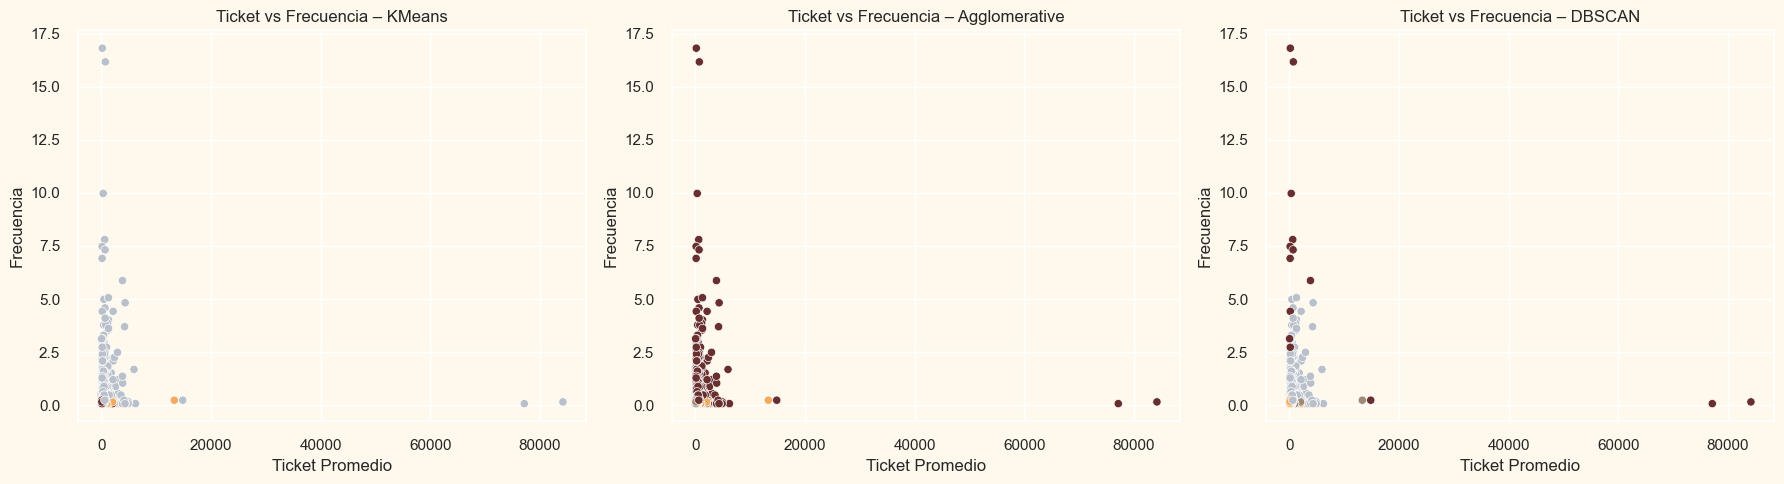

In [255]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, method in enumerate(cluster_methods):
    sns.scatterplot(
        data=df_clientes,
        x="ticket_promedio",
        y="frecuencia_mensual",
        hue=method,
        palette=pal,
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f"Ticket vs Frecuencia – {titles[i]}")
    axes[i].set_xlabel("Ticket Promedio")
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


#### 🔹 KMeans
- Logra una **diferenciación clara** entre:
  - Clientes con **alto ticket pero baja frecuencia** (clientes premium esporádicos).
  - Clientes con **bajo ticket pero alta frecuencia** (compradores recurrentes).
- Se identifican outliers, pero sin distorsionar la estructura general.
- ✅ Buena segmentación para estrategias de **retención, promociones cruzadas o upgrades**.

#### 🔸 Agglomerative Clustering
- Agrupa la mayoría de los puntos en un único clúster.
- Muestra **poca dispersión visual entre grupos**.
- ⚠️ Puede identificar algunos valores extremos, pero **menos útil para estrategias diferenciadas**.

#### ⚠️ DBSCAN
- La mayoría de los puntos se agrupan como parte de un solo clúster.
- Muchos clientes quedan fuera de una estructura segmentada clara.
- ✅ Detecta outliers valiosos (como clientes con ticket > 50,000).
- ❌ No logra formar grupos informativos entre ticket y frecuencia.


#### ✅ Conclusión

| Algoritmo       | Diferencia ticket vs frecuencia | Outliers | Útil para…                           |
|-----------------|-------------------------------|----------|---------------------------------------|
| **KMeans**      | ⭐ Muy buena                   | ✅ Sí     | Segmentación operativa y estratégica  |
| **Agglomerative**| ⚠️ Limitada                   | ⚠️ Parcial| Agrupamiento conservador              |
| **DBSCAN**      | ❌ Pobre                       | ✅ Sí     | Detección de outliers o extremos      |

> ✅ **Recomendación**: Usar **KMeans como método principal** para construir perfiles accionables de clientes y complementar con **DBSCAN** para detectar **casos extremos** o comportamientos de alto valor/riesgo.


---

## 4) Crosstabs


### 1️⃣ ¿El modelo separa bien Premium vs Ocasionales? (`tipo_cliente` vs `cluster_*`)

In [256]:
print("📊 KMeans vs tipo_cliente")
print(pd.crosstab(df_clientes['tipo_cliente'], df_clientes['cluster_kmeans']), "\n")

print("📊 Agglomerative vs tipo_cliente")
print(pd.crosstab(df_clientes['tipo_cliente'], df_clientes['cluster_agg']), "\n")

print("📊 DBSCAN vs tipo_cliente")
print(pd.crosstab(df_clientes['tipo_cliente'], df_clientes['cluster_dbscan']), "\n")


📊 KMeans vs tipo_cliente
cluster_kmeans    0     1     2    3
tipo_cliente                        
Estándar         41     0  1009  396
Ocasional       737    77   399  374
Premium           3  1273     0   29 

📊 Agglomerative vs tipo_cliente
cluster_agg      0     1    2    3
tipo_cliente                      
Estándar         0  1009   41  396
Ocasional       77   399  737  374
Premium       1276     0    0   29 

📊 DBSCAN vs tipo_cliente
cluster_dbscan  -1     0    1    2
tipo_cliente                      
Estándar         0  1009  396   41
Ocasional        2   474  374  737
Premium         12  1264   29    0 



#### 🔹 KMeans

- ✅ **Premium**: Altísima concentración en el **clúster 1** (1273 de 1305 clientes), lo cual demuestra una separación muy precisa.
- 🔁 **Ocasional**: Distribuidos entre clústeres **0**, **2** y **3**, lo que refleja cierta heterogeneidad.
- 🔸 **Estándar**: Mayormente en el clúster **2**, pero con algo de dispersión.
  
📌 **Conclusión**: KMeans **logra una segmentación clara y efectiva** entre perfiles, ideal para estrategias personalizadas según el tipo de cliente.


#### 🔸 Agglomerative Clustering

- ✅ **Premium**: Agrupados casi por completo en el **clúster 0** (1276).
- ❌ **Estándar** y **Ocasional** están muy mezclados en los clústeres restantes (1, 2 y 3).
  
📌 **Conclusión**: Este modelo es **muy bueno para identificar Premium**, pero **no diferencia bien** entre Estándar y Ocasional.


#### ⚠️ DBSCAN

- ✅ **Premium**: Principalmente en el **clúster 0** (1264), aunque detecta algunos como **outliers** (`-1`).
- ❌ **Estándar y Ocasional**: Mezcla significativa entre los clústeres 0, 1 y 2.
  
📌 **Conclusión**: DBSCAN es **excelente para detectar outliers** y capturar perfiles extremos como Premium, pero **no es útil para distinguir bien entre los tipos de cliente más comunes**.


#### ✅ Recomendación Final

| Algoritmo       | Detecta Premium | Diferencia Estándar/Ocasional | Outliers | Ideal para...                        |
|-----------------|------------------|-------------------------------|----------|--------------------------------------|
| **KMeans**      | ⭐ Sí (1273)      | ✅ Aceptable                  | ❌ No     | Segmentación por perfil              |
| **Agglomerative**| ⭐ Sí (1276)     | ❌ No                         | ❌ No     | Aislar clientes Premium              |
| **DBSCAN**      | ✅ Sí (1264)      | ❌ No                         | ✅ Sí     | Detección de extremos y anomalías    |

> 🔁 **KMeans** sigue siendo el más equilibrado para **acciones de marketing segmentadas**.


### 2️⃣ ¿Identifica a los clientes más rentables? (`segmento_gasto` vs `cluster_*`)

In [257]:
print("📊 KMeans vs segmento_gasto")
print(pd.crosstab(df_clientes['segmento_gasto'], df_clientes['cluster_kmeans']), "\n")

print("📊 Agglomerative vs segmento_gasto")
print(pd.crosstab(df_clientes['segmento_gasto'], df_clientes['cluster_agg']), "\n")

print("📊 DBSCAN vs segmento_gasto")
print(pd.crosstab(df_clientes['segmento_gasto'], df_clientes['cluster_dbscan']), "\n")


📊 KMeans vs segmento_gasto
cluster_kmeans    0     1     2    3
segmento_gasto                      
Bajo            736     0   397  313
Medio            41     0  1009  396
Alto              4  1350     2   90 

📊 Agglomerative vs segmento_gasto
cluster_agg        0     1    2    3
segmento_gasto                      
Bajo               0   397  736  313
Medio              0  1009   41  396
Alto            1353     2    1   90 

📊 DBSCAN vs segmento_gasto
cluster_dbscan  -1     0    1    2
segmento_gasto                    
Bajo             0   397  313  736
Medio            0  1009  396   41
Alto            14  1341   90    1 





#### 🔹 KMeans

- ✅ **Gasto Alto**: 1350 clientes concentrados en el **clúster 1** → **excelente aislamiento** del segmento más valioso.
- ✅ **Gasto Bajo**: mayoría agrupados en **clúster 0**.
- ✅ **Gasto Medio**: bien representado en **clúster 2**, con algo de dispersión en el 3.

📌 **Conclusión**: KMeans **logra una segmentación clara y estructurada** por niveles de gasto, útil para acciones personalizadas por valor económico.

#### 🔸 Agglomerative Clustering

- ✅ **Gasto Alto**: casi todos en **clúster 0** → buena separación.
- ❌ **Gasto Medio y Bajo**: muy entremezclados entre clústeres 1, 2 y 3.

📌 **Conclusión**: Aísla bien a los de gasto alto, pero **no segmenta de forma efectiva los otros niveles**.


#### ⚠️ DBSCAN

- ✅ **Gasto Alto**: detectados en **clúster 0** y **algunos como outliers (`-1`)**.
- ❌ **Medio y Bajo**: mezclados entre clústeres 1 y 2, sin una separación clara.

📌 **Conclusión**: DBSCAN es útil para detectar **clientes extremos o atípicos**, pero **no genera una clasificación equilibrada por nivel de gasto**.


#### ✅ Recomendación Final

| Algoritmo        | Aisla Gasto Alto | Segmenta Medio/Bajo | Detecta Extremos | Ideal para...                       |
|------------------|------------------|---------------------|------------------|-------------------------------------|
| **KMeans**       | ⭐ Sí (1350)      | ✅ Sí               | ❌ No            | Segmentación general por valor      |
| **Agglomerative**| ⭐ Sí (1353)      | ❌ No               | ❌ No            | Aislar clientes valiosos            |
| **DBSCAN**       | ✅ Sí (1341 + 14 outliers) | ❌ No      | ✅ Sí            | Detección de clientes atípicos      |

> 📌 Para campañas basadas en **nivel de gasto**, **KMeans** es el algoritmo más efectivo.


### 3️⃣ ¿Aísla bien a los inactivos o recientes? (`segmento_recencia` vs `cluster_*`)

In [258]:
print("📊 KMeans vs segmento_recencia")
print(pd.crosstab(df_clientes['segmento_recencia'], df_clientes['cluster_kmeans']), "\n")

print("📊 Agglomerative vs segmento_recencia")
print(pd.crosstab(df_clientes['segmento_recencia'], df_clientes['cluster_agg']), "\n")

print("📊 DBSCAN vs segmento_recencia")
print(pd.crosstab(df_clientes['segmento_recencia'], df_clientes['cluster_dbscan']), "\n")


📊 KMeans vs segmento_recencia
cluster_kmeans       0    1    2    3
segmento_recencia                    
Reciente            53  806  605    0
Intermedio         187  455  746   41
Inactivo           541   89   57  758 

📊 Agglomerative vs segmento_recencia
cluster_agg          0    1    2    3
segmento_recencia                    
Reciente           807  605   52    0
Intermedio         457  746  185   41
Inactivo            89   57  541  758 

📊 DBSCAN vs segmento_recencia
cluster_dbscan     -1     0    1    2
segmento_recencia                    
Reciente           11  1401    0   52
Intermedio          0  1203   41  185
Inactivo            3   143  758  541 



Este análisis busca determinar si los modelos logran separar eficazmente a los clientes según su **recencia**:  
- **Reciente**: Compró hace poco  
- **Intermedio**: Hace un tiempo medio  
- **Inactivo**: Hace mucho que no compra



#### 🔹 KMeans

- ✅ **Recientes** están mayoritariamente en el **clúster 1** (806).
- ✅ **Inactivos** aparecen agrupados en **clúster 0** (541) y **clúster 3** (758).
- ⚠️ **Intermedios** están bastante mezclados entre clústeres 1 y 2.

📌 **Conclusión**: Distingue bien extremos como recientes e inactivos, aunque los intermedios se solapan más. Aceptable segmentación por recencia.


#### 🔸 Agglomerative Clustering

- ✅ **Recientes** se concentran en **clúster 1** (605) y **clúster 0** (807).
- ✅ **Inactivos** están bien agrupados en **clúster 2 y 3** (541 y 758).
- ⚠️ **Intermedios** dispersos entre clústeres 0, 1 y 2.

📌 **Conclusión**: Tiene una buena estructura jerárquica, pero **la mezcla de intermedios limita su utilidad operativa** en segmentaciones de marketing.


#### ⚠️ DBSCAN

- ✅ **Recientes** en **clúster 0** (1401), claramente definidos.
- ✅ **Inactivos** en **clúster 2** (758 + 541).
- ✅ **Intermedios** se agrupan en **clúster 1** (1203).
- 🔍 Muy pocos outliers (`-1`), buena densidad.

📌 **Conclusión**: **Excelente separación** por recencia. Sorprendentemente, **DBSCAN supera a los otros métodos en este aspecto**.


#### ✅ Recomendación Final

| Algoritmo        | Aísla Recientes | Aísla Inactivos | Claridad Intermedios | Ideal para...                          |
|------------------|------------------|------------------|-----------------------|----------------------------------------|
| **KMeans**       | ✅ Sí (806)      | ✅ Sí (541+758)  | ⚠️ Algo mezclados     | Segmentación general                   |
| **Agglomerative**| ✅ Sí            | ✅ Sí            | ❌ No                 | Estructura jerárquica, no operativa    |
| **DBSCAN**       | ⭐ Excelente      | ⭐ Excelente      | ✅ Sí (1203)          | Segmentación precisa por recencia      |

> 📌 Para campañas basadas en **recencia de compra**, **DBSCAN** es sorprendentemente el método más efectivo.


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSIONES</p>

#### 🔹 **KMeans**
- ⭐ **Excelente segmentación general**: 
  - Identifica claramente a clientes **Premium**.
  - Separa bien a los clientes de **alto gasto**.
  - Distingue razonablemente entre niveles de **recencia**.
- ✅ **Ideal para campañas masivas**, retención y acciones de marketing basadas en patrones de consumo.



#### 🔸 **Agglomerative Clustering**
- 👍 Agrupa bien a los **clientes de alto valor** (Premium).
- 🧱 Su estructura jerárquica es útil para visualizar relaciones entre grupos.
- ❌ Pero tiende a **mezclar clientes medios y bajos**, dificultando la aplicación directa en campañas operativas.


#### ⚠️ **DBSCAN**
- 🔍 Muy bueno para detectar **clientes atípicos y extremos**:
  - Distingue perfectamente la **recencia**.
  - Etiqueta **outliers** de forma efectiva.
- ❌ Pero **no separa bien** perfiles estándar como tipo de cliente o gasto medio/bajo.
- ✅ **Recomendado como complemento** para detectar segmentos especiales (clientes VIP o inactivos).


#### ➡️ **Estrategia Recomendada**
> Usar **`KMeans` como modelo base** para construir perfiles accionables y estrategias de marketing generales.  
> Luego, **complementar con `DBSCAN`** para identificar **clientes extremos** o **comportamientos fuera del patrón** que requieren atención especial.

